In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Load Library And Dataset

In [ ]:
# ! pip install tensorflow
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 85kB/s 
     |████████████████████████████████| 3.2MB 29.3MB/s 
     |████████████████████████████████| 491kB 41.6MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
# yah buat gitu pokoknya
import pandas as pd

# buat structuring data
import numpy as np
from numpy import hstack

# buat ngitung execution running time
import time

# visualizating
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

# for rounding value
import math
# for square root
from math import sqrt

# splitting data
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler
# mse measuring
from sklearn.metrics import mean_squared_error

# merging dataframe
from functools import reduce

# rnn library
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model # visualize model
#from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# for model building
datasetkurs = pd.read_csv("/content/drive/My Drive/KULIAH/TA/TA/Dataset/Historical Data USD_IDR .csv", thousands= ",")
datasetsaham_astra = pd.read_csv("/content/drive/My Drive/KULIAH/TA/TA/Dataset/Historical Data Stock ASII.csv",thousands= ",")

# other stock characteristics
datasetsaham_medcoenergi = pd.read_csv("/content/drive/My Drive/KULIAH/TA/TA/Dataset/Historical Data Stock MEDC- Gainer.csv", thousands= ",") # most gainer
datasetsaham_indofarma = pd.read_csv("/content/drive/My Drive/KULIAH/TA/TA/Dataset/Historical Data Stock INAF - Losser.csv", thousands= ",") # most losser 

# periode oktober 2014 - mei 2020
datasetsaham_astra_full = pd.read_csv("/content/drive/My Drive/KULIAH/TA/TA/Dataset/Historical Data Stock ASII Oct 2014 - May 2020.csv",thousands= ",")
datasetkurs_full = pd.read_csv("/content/drive/My Drive/KULIAH/TA/TA/Dataset/Historical Data Kurs Oct 2014 - May 2020.csv", thousands= ",")


#Pra Processing and Visualizating

Description:

*   Feature selection
*   Forming currency and stock dataset into one dataset
*   Reverse time series from 2019-2014 to 2014-2019
*   Fill missing value
*   Split data again into each enterprise





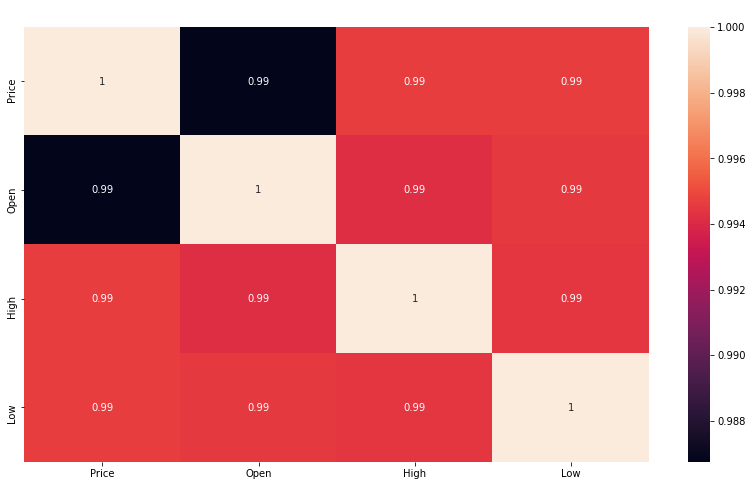

In [ ]:
plt.figure(figsize = (14,8))
title_obj = plt.title('Korelasi Tiap Feature', size = 18)
plt.setp(title_obj, color='white')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(sahamASII_corr, dtype=np.bool))

sns.heatmap(
          datasetsaham_astra.corr(),
          # mask = mask,
          annot = True
        )

plt.show()

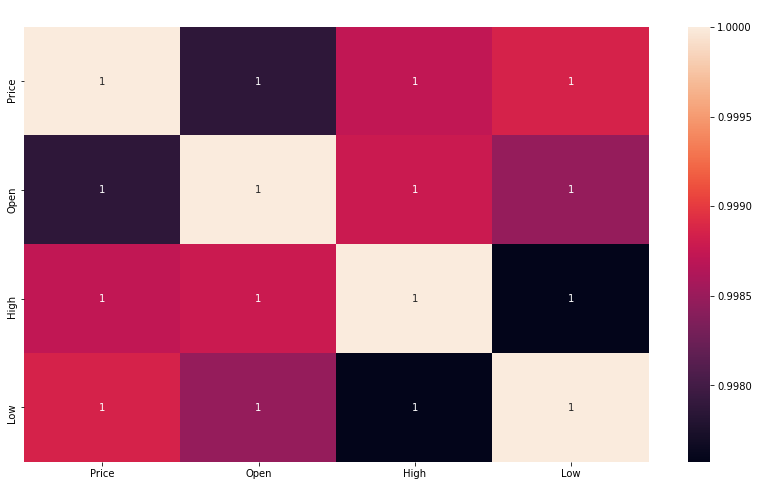

In [ ]:
plt.figure(figsize = (14,8))
title_obj = plt.title('Korelasi Tiap Feature', size = 18)
plt.setp(title_obj, color='white')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(kurs_corr, dtype=np.bool))

sns.heatmap(
          datasetkurs.corr(),
          # mask = mask,
          annot = True
        )

plt.show()

In [ ]:
# only take date and close price column
dataset_kurs = datasetkurs[['Date', 'Price']]
dataset_sahamASII = datasetsaham_astra[['Date', 'Price']]
dataset_sahamMEDC = datasetsaham_medcoenergi[['Date', 'Price']]
dataset_sahamINAF = datasetsaham_indofarma[['Date', 'Price']]

dataset_sahamASII_full = datasetsaham_astra_full[['Date', 'Price']]
dataset_kurs_full = datasetkurs_full[['Date', 'Price']]

In [ ]:
# compile the list of dataframes you want to merge
df_merged = reduce(lambda  
                      left,right: pd.merge(
                                    left,right,
                                    on=['Date'], how='left'
                                  ), 
                   [dataset_kurs, dataset_sahamASII, dataset_sahamMEDC, dataset_sahamINAF] # dataframe yang pengen digabung
                   )

# configuring urutan data
dataset = df_merged[::-1] # reverse from bottom
dataset = dataset.reset_index(drop=True) # drop index column
dataset.index = dataset.index + 1 # start index from 1
dataset.columns = ['date', 'currency','ASII_stock', 'MEDC_stock', 'INAF_stock']
dataset.head(10)

,date,currency,ASII_stock,MEDC_stock,INAF_stock
1,"Oct 01, 2014",12127.5,7000.0,3785.0,163.0
2,"Oct 02, 2014",12150.0,6600.0,3700.0,160.0
3,"Oct 03, 2014",12176.5,6600.0,3710.0,156.0
4,"Oct 06, 2014",12210.0,6725.0,3740.0,153.0
5,"Oct 07, 2014",12202.5,6800.0,3780.0,160.0
6,"Oct 08, 2014",12240.0,6700.0,3685.0,159.0
7,"Oct 09, 2014",12185.0,6725.0,3670.0,159.0
8,"Oct 10, 2014",12220.0,6500.0,3715.0,158.0
9,"Oct 13, 2014",12216.0,6350.0,3735.0,160.0
10,"Oct 14, 2014",12207.5,6400.0,3740.0,158.0


In [ ]:
# combining data oktober-now period
# compile the list of dataframes you want to merge
df_merged_full = reduce(lambda  
                      left,right: pd.merge(
                                    left,right,
                                    on=['Date'], how='left'
                                  ), 
                   [dataset_kurs_full, dataset_sahamASII_full] # dataframe yang pengen digabung
                   )

# configuring urutan data
dataset_full = df_merged_full[::-1] # reverse from bottom
# dataset_oktmay = dataset_oktmay.reset_index(drop=True) # drop index column
dataset_full = dataset_full.reset_index(drop=True) # drop index column
dataset_full.index = dataset_full.index + 1 # start index from 1
dataset_full.columns = ['tanggal', 'harga_kurs','saham_ASII']
dataset_full

,tanggal,harga_kurs,saham_ASII
1,"Oct 01, 2014",12127.5,7000.0
2,"Oct 02, 2014",12150.0,6600.0
3,"Oct 03, 2014",12176.5,6600.0
4,"Oct 06, 2014",12210.0,6725.0
5,"Oct 07, 2014",12202.5,6800.0
...,...,...,...
1463,"May 14, 2020",14885.0,3570.0
1464,"May 15, 2020",14860.0,3710.0
1465,"May 18, 2020",14850.0,3910.0
1466,"May 19, 2020",14770.0,3950.0


In [ ]:
# checking for missing value
dataset.isnull().sum()

date           0
currency       0
ASII_stock    91
MEDC_stock    91
INAF_stock    92
dtype: int64

In [ ]:
# checking for missing value
dataset_full.isnull().sum()

tanggal        0
harga_kurs     0
saham_ASII    95
dtype: int64

In [ ]:
dataset[dataset.isnull().any(axis=1)] 
# dataset.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Dataset.xlsx")

,date,currency,XYZ,ABC,DEF
62,"Dec 25, 2014",12467.5,NaN,NaN,NaN
63,"Dec 26, 2014",12467.5,NaN,NaN,NaN
66,"Dec 31, 2014",12385.0,NaN,NaN,NaN
67,"Jan 01, 2015",12385.0,NaN,NaN,NaN
102,"Feb 19, 2015",12842.5,NaN,NaN,NaN
...,...,...,...,...,...
1219,"Jun 03, 2019",14275.0,NaN,NaN,NaN
1220,"Jun 04, 2019",14275.0,NaN,NaN,NaN
1221,"Jun 05, 2019",14275.0,NaN,NaN,NaN
1222,"Jun 06, 2019",14275.0,NaN,NaN,NaN


In [ ]:
# dataset_oktmay.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Dataset Oktober 2019 - Mei 2020.xlsx")
dataset_oktmay[dataset_oktmay.isnull().any(axis=1)]

,tanggal,harga_kurs,saham_ASII
61,"Dec 24, 2019",13967.5,NaN
62,"Dec 25, 2019",13967.5,NaN
66,"Dec 31, 2019",13882.5,NaN
67,"Jan 01, 2020",13882.5,NaN


In [ ]:
dataset.iloc[1217:1223]

,date,currency,XYZ,ABC,DEF
1218,"May 31, 2019",14275.0,7450.0,775.0,3500.0
1219,"Jun 03, 2019",14275.0,NaN,NaN,NaN
1220,"Jun 04, 2019",14275.0,NaN,NaN,NaN
1221,"Jun 05, 2019",14275.0,NaN,NaN,NaN
1222,"Jun 06, 2019",14275.0,NaN,NaN,NaN
1223,"Jun 07, 2019",14275.0,NaN,NaN,NaN


In [ ]:
# fill the missing value
dataset = dataset.fillna(method = 'ffill') 
# check again for missing value
dataset.isnull().sum()
dataset.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Dataset Not Null.xlsx")

In [ ]:
# fill the missing value
dataset_oktmay = dataset_oktmay.fillna(method = 'ffill') 
# check again for missing value
dataset_oktmay.isnull().sum()

tanggal       0
harga_kurs    0
saham_ASII    0
dtype: int64

In [ ]:
# fill the missing value
dataset_full = dataset_full.fillna(method = 'ffill') 
# check again for missing value
dataset_full.isnull().sum()

tanggal       0
harga_kurs    0
saham_ASII    0
dtype: int64

In [ ]:
# # split into each perusahaan # FOR TA
# data_ASII = dataset.drop(columns= ['saham_MEDC', 'saham_INAF'])
# data_MEDC = dataset.drop(columns= ['saham_ASII', 'saham_INAF'])
# data_INAF = dataset.drop(columns= ['saham_MEDC', 'saham_ASII'])

In [ ]:
# split into each perusahaan # FOR PAPER
data_ASII = dataset.drop(columns= ['ABC', 'DEF'])
data_MEDC = dataset.drop(columns= ['XYZ', 'DEF'])
data_INAF = dataset.drop(columns= ['ABC', 'XYZ'])



>Visualisasi Harga Saham Harian Masing-Masing Perusahaan





> Harga Saham PT. Astra International Tbk.






In [ ]:
fig = go.Figure(data=go.Ohlc(x=datasetsaham_astra['Date'],
                    open=datasetsaham_astra['Open'],
                    high=datasetsaham_astra['High'],
                    low=datasetsaham_astra['Low'],
                    close=datasetsaham_astra['Price']))

fig.update_layout(
    title="ASII Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Harga Saham",
    yaxis_title="Tanggal",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    )
)

fig.show()

In [ ]:
fig = px.line(
        data_ASII , 
        x="tanggal", y='saham_ASII', 
        #title='ASII - Harga Saham Harian PT. Astra International Tbk. (Okt 2014 - Sept 2019 Period)'
      )
fig.update_layout(
    #title="ASII Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

In [ ]:
fig = px.line(
        dataset_oktmay[['tanggal', 'saham_ASII']] , 
        x="tanggal", y='saham_ASII', 
        #title='ASII - Harga Saham Harian PT. Astra International Tbk. (Okt 2014 - Sept 2019 Period)'
      )
fig.update_layout(
    #title="ASII Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()



> Harga Saham Medco Energi Internasional Tbk



In [ ]:
fig = go.Figure(data=go.Ohlc(x=datasetsaham_medcoenergi['Date'],
                    open=datasetsaham_medcoenergi['Open'],
                    high=datasetsaham_medcoenergi['High'],
                    low=datasetsaham_medcoenergi['Low'],
                    close=datasetsaham_medcoenergi['Price']))

fig.update_layout(
    title="MEDC Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Harga Saham",
    yaxis_title="Tanggal",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    )
)

fig.show()

In [ ]:
fig = px.line(data_MEDC , x="tanggal", y='saham_MEDC')
fig.update_layout(
    #title={
     #   'text': "Plot Title",  
     #   'y':0.9,
     #   'x':0.5,
     #   'xanchor': 'center',
     #   'yanchor': 'top'}
    #title="Perbandingan Harga Saham Harian ASII - MEDC - INAF (Periode Okt 2014 - Sept 2019)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

In [ ]:
fig = go.Figure(data=go.Ohlc(x=datasetsaham_indofarma['Date'],
                    open=datasetsaham_indofarma['Open'],
                    high=datasetsaham_indofarma['High'],
                    low=datasetsaham_indofarma['Low'],
                    close=datasetsaham_indofarma['Price']))

fig.update_layout(
    title="INAF Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Harga Saham",
    yaxis_title="Tanggal",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

In [ ]:
fig = px.line(data_INAF , x="tanggal", y='saham_INAF')
fig.update_layout(
    #title={
     #   'text': "Plot Title",  
     #   'y':0.9,
     #   'x':0.5,
     #   'xanchor': 'center',
     #   'yanchor': 'top'}
    #title="Perbandingan Harga Saham Harian ASII - MEDC - INAF (Periode Okt 2014 - Sept 2019)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

In [ ]:
df_melt = dataset.melt(id_vars='date', value_vars=['XYZ', 'ABC', 'DEF'])
fig = px.line(df_melt, x='date' , y='value' , color='variable')
fig.update_layout(
    #title={
     #   'text': "Plot Title",  
     #   'y':0.9,
     #   'x':0.5,
     #   'xanchor': 'center',
     #   'yanchor': 'top'}
    #title="Perbandingan Harga Saham Harian ASII - MEDC - INAF (Periode Okt 2014 - Sept 2019)",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=16,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.7,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

USD-IDR Currency Historical Data (Okt 2014-Sept 2019 Period)

In [ ]:
fig = px.line(
        dataset_kurs, 
        x="Date", 
        y='Price', 
        #title='USD-IDR Currency Historical Data (Okt 2014-Sept 2019 Period)'
      )
fig.update_layout(
    #title="ASII Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Kurs Dollar Terhadap Rupiah",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

In [ ]:
fig = px.line(
        datasetkurs_oktmay, 
        x="Date", y='Close', 
      )
fig.update_layout(
    #title="ASII Historical Data (Periode 30 Sept 2019 - 1 Okt 2014)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Kurs Dollar Terhadap Rupiah",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

Perbandingan Harga Saham Harian ASII dan Kurs Dollar Terhadap Rupiah (Periode Okt 2014 - Sept 2019)

In [ ]:
df_melt = dataset.melt(id_vars='tanggal', value_vars=['harga_kurs', 'saham_ASII'])
fig = px.line(df_melt, x='tanggal' , y='value' , color='variable')
fig.update_layout(
    #title={
     #   'text': "Plot Title",  
     #   'y':0.9,
     #   'x':0.5,
     #   'xanchor': 'center',
     #   'yanchor': 'top'}
    #title="Perbandingan Harga Saham Harian ASII dan Kurs Dollar Terhadap Rupiah (Periode Okt 2014 - Sept 2019)",
    xaxis_title="Tanggal",
    yaxis_title="Harga",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig.show()

# Preparing Data

Description:

*   Set training, validation, and testing size
*   Remove 'tanggal'
*   Prepare actual data as comparison





In [ ]:
# split data into 70 (training) : 30 (testing)
training_size = math.ceil(len(dataset)*0.70)
test_size = len(dataset) - training_size
valid_size = 0.30

In [ ]:
# drop 'tanggal' for modelling
dataset_ASII, dataset_MEDC, dataset_INAF = data_ASII.drop('tanggal', axis= 1) , data_MEDC.drop('tanggal', axis= 1), data_INAF.drop('tanggal', axis= 1)

# for data comparison
ASII_train, ASII_test = train_test_split(data_ASII, test_size=test_size, shuffle=False)
data_aktual = ASII_test.drop(columns= 'harga_kurs')
data_aktual = data_aktual.reset_index(drop=True)
data_aktual.index = data_aktual.index + 1 # start index from 1

MEDC_train, MEDC_test = train_test_split(data_MEDC, test_size=test_size, shuffle=False)
data_aktual_MEDC = MEDC_test.drop(columns= 'harga_kurs')
data_aktual_MEDC = data_aktual_MEDC.reset_index(drop=True) # drop index column
data_aktual_MEDC.index = data_aktual_MEDC.index + 1 # start index from 1

INAF_train, INAF_test = train_test_split(data_INAF, test_size=test_size, shuffle=False)
data_aktual_INAF = INAF_test.drop(columns= 'harga_kurs')
data_aktual_INAF = data_aktual_INAF.reset_index(drop=True) # drop index column
data_aktual_INAF.index = data_aktual_INAF.index + 1 # start index from 1

# Important Function!

Create model evaluator function

In [ ]:
# creating MAPE function
def MAPE(actual_testing, forecast): 
    actual_testing, forecast = np.array(actual_testing), np.array(forecast)
    return np.mean(np.abs((actual_testing - forecast) / actual_testing)) * 100

# creating RMSE function # GA KEPAKE
def MSE(actual_testing, forecast): 
    actual_testing, forecast = np.array(actual_testing), np.array(forecast)
    return mean_squared_error(actual_testing, forecast)

Splitting data function

In [ ]:
# split dataset into training : testing
def split_dataset(data , trainingsize):
  train, test = train_test_split(data, train_size= trainingsize, shuffle=False)
  return train , test

Normalization function

In [ ]:
def featureScaling(data, stockname, input_type):
  if (input_type.lower() == 'univariate') :
    normalizer = MinMaxScaler(feature_range= (0,1)) # scaling
    data_normalized = normalizer.fit_transform(data)
    return (data_normalized, normalizer)
  
  elif (input_type.lower() == 'multivariate') :
    saham_normalizer, kurs_normalizer = MinMaxScaler(feature_range= (0,1)), MinMaxScaler(feature_range= (0,1)) # scaling
    saham_normalized = saham_normalizer.fit_transform(data[[stockname]])
    kurs_normalized = kurs_normalizer.fit_transform(data[['harga_kurs']])
    return saham_normalized, kurs_normalized, saham_normalizer, kurs_normalizer

Get input and output for building model

In [ ]:
def getInputOutput(data, trainsubset_size, input_type):
  input, output = [] , []
  
  if (input_type.lower() == 'univariate') :
    for i in range(n_timestep, trainsubset_size): 
        input.append(data[(i-n_timestep):i,0])
        output.append(data[i,0])
  
  elif (input_type.lower() == 'multivariate') :
    for i in range(n_timestep, trainsubset_size):
      input.append(data[(i-n_timestep):i, : ])
      output.append(data[i,1])
  
  input, output = np.array(input), np.array(output)
  return (input, output)

Build model and predict using fit model function

In [ ]:
# build model
def build_model(data, params_list, input_type):
	#get input and output for model
	input, output = getInputOutput(data= data, trainsubset_size= len(data), input_type= input_type)
 
	# reshape into [ samples, timestep, how many features to predict]
	if (input_type.lower() == 'univariate'):
		input = input.reshape((input.shape[0], input.shape[1], n_features_univariate))
	
	# unpack params_list
	n_nodes, activation_type, n_batchSize, optimizer_type, dropout_rate = params_list
	
	# define model
	model = Sequential()
	model.add(SimpleRNN(units = n_nodes, input_shape=(input.shape[1] , input.shape[2]), activation= activation_type, dropout = dropout_rate))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer = optimizer_type)
 
	# fit model
	start_time = time.time()
	model_built = model.fit(input , output, epochs = 50, batch_size = n_batchSize, validation_split= valid_size, verbose = 0)
	running_time = time.time() - start_time
	print("Running Time Model : --- %s seconds ---" % running_time)
	val_loss = model_built.history['val_loss']
	val_loss = pd.DataFrame(val_loss)
	val_loss.columns = ['val_loss']

	loss = model_built.history['loss']
	loss = pd.DataFrame(loss)
	loss.columns = ['loss']
	loss_model = pd.concat((loss, val_loss), axis=1)
	
	return (model, running_time, loss_model)

# forecast with the fit model
def model_predict(model, data_train, data_test, feature_scaler):
	# prepare data
	dataset_total = pd.concat((data_train , data_test), axis = 0)
	input_test = dataset_total[len(dataset_total) - len(data_test) - n_timestep:].values
	input_test = input_test.reshape(-1,1) #Jadiin Matriks, Sebelumnya Vektor
	input_test = feature_scaler.transform(input_test)

	input = []
	for i in range(n_timestep, len(input_test)):
			input.append(input_test[i-n_timestep:i, 0])
	input = np.array(input)
	input = input.reshape((input.shape[0], input.shape[1], n_features_univariate))

	# forecast
	result = model.predict(input)
	result = feature_scaler.inverse_transform(result) # denormalization forecast result
	return result

# forecast with the fit model
def model_predictMultivariate(model, stockname, data_train, data_test, saham_scaler, kurs_scaler):
	# prepare data
	dataset_total = pd.concat((data_train , data_test), axis = 0)
	input_test = dataset_total[len(dataset_total) - len(data_test) - n_timestep:]
	input_test = input_test.reset_index(drop=True) # drop index column
	input_test.index = input_test.index + 1 # start index from 1
  
	# normalize data testing
	saham_normalized = saham_scaler.transform(input_test[[stockname]])  
	kurs_normalized = kurs_scaler.transform(input_test[['harga_kurs']])
 
	# convert to [rows, columns] structure
	saham_normalized = saham_normalized.reshape((len(saham_normalized), 1))
	kurs_normalized = kurs_normalized.reshape((len(kurs_normalized), 1))
	# combine features by horizontally
	input_test_multivariate = hstack((kurs_normalized, saham_normalized))
 
	input = []
	for i in range(n_timestep, len(input_test_multivariate)):
			input.append(input_test_multivariate[(i-n_timestep):i, : ])
	input = np.array(input)
	input = input.reshape((input.shape[0], input.shape[1], 2))

	# forecast
	result = model.predict(input)
	result = saham_scaler.inverse_transform(result) # denormalization forecast result
	return result

In [ ]:
def combineWithActual(actual, forecast):
  # convert prediction result to dataframe
  forecast = pd.DataFrame(forecast)
  forecast.index = forecast.index+1

# combine actual result with predicted result 
  result = pd.concat([actual, forecast], axis = 1)
  result.columns = ['tanggal','Harga Saham Aktual', 'Harga Saham Prediksi']
  return result

Grid Search

In [ ]:
# create a list of parameters to try
def model_parameters_list(n_hidden_layer):
	# define scope of configs
	n_nodes = n_hidden_layer
	activation_type = ['relu', 'softsign', 'tanh']
	n_batch = [32, 64, 96]
	optimizer_type = ['adam', 'rmsprop', 'sgd']
	dropout_rate = [0.1, 0.3, 0.5]
	# create configs
	params_list = list()
	for node in n_nodes:
		for activation in activation_type:
			for batchsize in n_batch:
				for optimizer in optimizer_type:
					for dropout in dropout_rate:
						params = [node, activation, batchsize, optimizer, dropout]
						params_list.append(params)
	print('Total Parameter Scenario: %d' % len(params_list))
	return params_list

In [ ]:
# grid search configs
def grid_search(data, list_parameter, build_iteration, stockname, input_type):
	# evaluate configs
	scores = [repeat_evaluate(data, parameter, build_iteration, stockname, input_type) for parameter in list_parameter]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# score a model, repeating building model for n_repeats times
def repeat_evaluate(data, parameter_list, n_repeats, stockname, input_type):
	# convert config to a key
	parameter = str(parameter_list)
	# fit and evaluate the model n times
	mape_scores = [evaluate_model(data, parameter, parameter_list, i, stockname, input_type) for i in range(n_repeats)]
	# summarize score
	mape = min(mape_scores)
	print('> Best MAPE of model with parameter %s is %.3f' % (parameter, mape))
	return (parameter, mape)

# build -> predict to validation set -> get MAPE
def evaluate_model(data, parameter, parameter_list, iteration, stockname, input_type):
	data_train, data_test = split_dataset(data= data, trainingsize= training_size)
	# if model is univariate
	if(input_type.lower() == 'univariate'):
		# normalize data
		data_train_normalized, normalizer = featureScaling(data_train, stockname, input_type)
		# fit model
		model, runningtime, loss_model = build_model(data = data_train_normalized, 
		                                             params_list= parameter_list, 
														input_type= input_type)
		# predict model
		predictions = model_predict(model= model, data_train= data_train, data_test= data_test, feature_scaler = normalizer)
	 	
		# combine with actual
		result = combineWithActual(actual= data_aktual, forecast= predictions )
		# estimate prediction error (MAPE)
		error = MAPE(result['Harga Saham Aktual'], result['Harga Saham Prediksi'])
		print('MAPE iteration %s = %.3f' % (iteration+1, error))
		
		# write to excel
		result.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Univariate/Timestep " 
		                + str(n_timestep) + "/Forecast Result " + parameter + " with MAPE " + str(round(error, 3)) 
									+ " and build time " + str(round(runningtime, 3)) + ".xlsx") 
		# write MAPE, buildtime, loss, and val_loss result to excel
		buildtime = [runningtime]
		buildtime = pd.DataFrame(buildtime)
		buildsamaloss = pd.concat((buildtime, loss_model), axis=0)

		# store MAPE
		mape_error = [error]
		mape_error = pd.DataFrame(mape_error)

		mape_buildtime_loss_valloss = pd.concat((mape_error, buildsamaloss), axis=1)
		mape_buildtime_loss_valloss.columns = ['mape', 'build_time','loss', 'val_loss']
		mape_buildtime_loss_valloss.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Univariate/Timestep " 
		                                     + str(n_timestep) + "/Recap " + parameter + " with MAPE " + str(round(error, 3)) +".xlsx") 
		return error

	# if model is multivariate
	elif(input_type.lower() == 'multivariate'):
		# normalize data
		saham_normalized, kurs_normalized, saham_normalizer, kurs_normalizer = featureScaling(data_train, stockname, input_type)
		# convert to [rows, columns] structure
		saham = saham_normalized.reshape((len(saham_normalized), 1))
		kurs = kurs_normalized.reshape((len(kurs_normalized), 1))

		# combine features by horizontally
		input_multivariate = hstack((kurs, saham))
		# fit model
		model, runningtime, loss_model = build_model(data = input_multivariate, params_list= parameter_list, input_type= input_type)
		
		# predict model
		predictions = model_predictMultivariate(model= model, stockname= stockname, data_train= data_train, data_test= data_test, saham_scaler= saham_normalizer, kurs_scaler= kurs_normalizer)
		# combine with actual
		result = combineWithActual(actual= data_aktual, forecast= predictions )
		
		# estimate prediction error (MAPE)
		error = MAPE(result['Harga Saham Aktual'], result['Harga Saham Prediksi'])
		# estimate prediction error (MSE)
		errorMSE = MSE(saham_normalizer.transform(result[['Harga Saham Aktual']]), saham_normalizer.transform(result[['Harga Saham Prediksi']]))
		print('MAPE iteration %s = %.3f' % (iteration+1, error))
		
		# write forecast result to excel
		result.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Multivariate/Timestep " + str(n_timestep) + "/Forecast Result " + parameter + " with MAPE " +str(round(error, 3)) + " and build time " + str(round(runningtime, 3)) + ".xlsx") 
		# write MAPE, buildtime, loss, and val_loss result to excel
		buildtime = [runningtime]
		buildtime = pd.DataFrame(buildtime)
		buildsamaloss = pd.concat((buildtime, loss_model), axis=0)
		
		# store MAPE
		mape_error = [error]
		mape_error = pd.DataFrame(mape_error)

		# store MSE
		mse_error = [errorMSE]
		mse_error = pd.DataFrame(mse_error)
	
		mape_msetest_buildtime_loss_valloss = pd.concat((mape_error, mse_error, buildsamaloss), axis=1)
		mape_msetest_buildtime_loss_valloss.columns = ['mape', 'mse_error', 'build_time','loss', 'val_loss']
		mape_msetest_buildtime_loss_valloss.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Multivariate/Timestep " + str(n_timestep) + "/Recap " + parameter + " with MAPE " + str(round(error, 3)) +".xlsx") 
	 			
		return error

# Building Elman-RNN Forecasting Model

In [ ]:
# how many time step backward to predict future?
n_timestep = 6



> Forecast PT Astra International Tbk.'s Stock (Stock Only)




In [ ]:
# how many feature to be predicted?
n_features_univariate = 1
n_features_multivariate = 2

In [ ]:
# remove harga_kurs on data
dataset_ASII_univariate = dataset_ASII.drop(columns= 'harga_kurs')

Cek manual untuk mengetahui kapan konvergen error nya

In [ ]:
# split into data training : data testing
data_training_univariate, data_testing_univariate = split_dataset(data=dataset_ASII_univariate, trainingsize= training_size)

In [ ]:
saham_normalized, normalizer = featureScaling(data_training_univariate, stockname='saham_ASII', input_type= 'univariate')

In [ ]:
train_input_univariate, train_output_univariate = getInputOutput(
                                                    data= saham_normalized, 
                                                    trainsubset_size= len(data_training_univariate), 
                                                    input_type= 'univariate'
                                                  )
# reshape into [ samples, timestep, how many features to predict]
train_input_univariate = train_input_univariate.reshape((train_input_univariate.shape[0], 
                                                         train_input_univariate.shape[1], 
                                                         n_features_univariate))

In [ ]:
for i in range(len(train_input_univariate)):
  print(train_input_univariate[i], train_output_univariate[i])

Streaming output truncated to the last 5000 lines.
 [0.57142857]] 0.5776397515527951
[[0.50931677]
 [0.47826087]
 [0.53416149]
 [0.54037267]
 [0.57142857]
 [0.57763975]] 0.6335403726708075
[[0.47826087]
 [0.53416149]
 [0.54037267]
 [0.57142857]
 [0.57763975]
 [0.63354037]] 0.6521739130434783
[[0.53416149]
 [0.54037267]
 [0.57142857]
 [0.57763975]
 [0.63354037]
 [0.65217391]] 0.7329192546583849
[[0.54037267]
 [0.57142857]
 [0.57763975]
 [0.63354037]
 [0.65217391]
 [0.73291925]] 0.7204968944099379
[[0.57142857]
 [0.57763975]
 [0.63354037]
 [0.65217391]
 [0.73291925]
 [0.72049689]] 0.670807453416149
[[0.57763975]
 [0.63354037]
 [0.65217391]
 [0.73291925]
 [0.72049689]
 [0.67080745]] 0.670807453416149
[[0.63354037]
 [0.65217391]
 [0.73291925]
 [0.72049689]
 [0.67080745]
 [0.67080745]] 0.6521739130434783
[[0.65217391]
 [0.73291925]
 [0.72049689]
 [0.67080745]
 [0.67080745]
 [0.65217391]] 0.6770186335403727
[[0.73291925]
 [0.72049689]
 [0.67080745]
 [0.67080745]
 [0.65217391]
 [0.67701863]] 

NOTE !!

  **Batch size** is a **number of samples processed before the model is updated**.

  **Epoch** is the **number of complete passes through the training dataset**.

  The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

  Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

  This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

  This also means that one epoch will involve 40 batches or 40 updates to the model.

  With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

1. Build model with train subset

In [ ]:
# setup model parameter
n_hiddenlayerunits = 2 * train_input_univariate.shape[1] # define how many units in hidden layer
dropout_rate = 0.1 # Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.
n_batchSize = 32 # buat apa ya lupa
activation_type = "relu"
optimizer_type = "rmsprop"
modelname = "T11"

In [ ]:
# build model to training subset
# Initialising the RNN
model_univariate = Sequential()

# units is how many hidden layer
model_univariate.add(SimpleRNN(
                          units = n_hiddenlayerunits, 
                          input_shape = (train_input_univariate.shape[1] , train_input_univariate.shape[2]), 
                          activation = activation_type, 
                          dropout = dropout_rate
                        )
                      ) 

# Adding the output layer
model_univariate.add(Dense(units = 1))

# Compiling the RNN
model_univariate.compile(loss='mean_squared_error', optimizer=optimizer_type)
# modelfit_univariate = model_univariate.fit(
#       train_input_univariate, # independent features to predict
#       train_output_univariate, # dependent features to predict
#       epochs = 50, # number of complete passes through the training dataset
#       batch_size = n_batchSize, # number of samples processed before the model is updated
#       validation_split= valid_size
#       #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
#   )
model_univariate.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


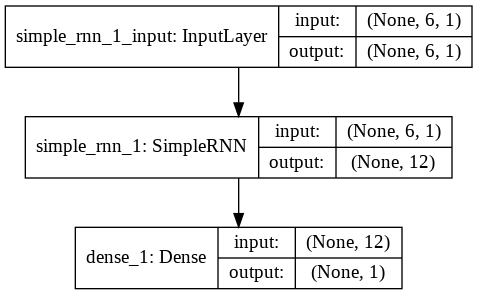

In [ ]:
plot_model(model_univariate, to_file='/content/drive/My Drive/KULIAH/TA/TA/Documentation/model_uni_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
# build model to training subset
  # Initialising the RNN
  model_univariate = Sequential()

  # units is how many hidden layer
  model_univariate.add(SimpleRNN(
                          units = n_hiddenlayerunits, 
                          input_shape = (train_input_univariate.shape[1] , train_input_univariate.shape[2]), 
                          activation = activation_type, 
                          dropout = dropout_rate
                        )
                      ) 

  # Adding the output layer
  model_univariate.add(Dense(units = 1))

  # Compiling the RNN
  model_univariate.compile(loss='mean_squared_error', optimizer=optimizer_type)

  #model.summary()

  # Fitting the RNN to the Training set
  start_time = time.time()
  modelfit_univariate = model_univariate.fit(
      train_input_univariate, # independent features to predict
      train_output_univariate, # dependent features to predict
      epochs = 100, # number of complete passes through the training dataset
      batch_size = n_batchSize, # number of samples processed before the model is updated
      validation_split= valid_size
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
  )
  runningtime = time.time() - start_time
  print("Running Time Model : --- %s seconds ---" % runningtime)

Train on 907 samples, validate on 200 samples
Epoch 1/100
907/907 [==============================] - 1s 1ms/step - loss: 0.2610 - val_loss: 0.1757
Epoch 2/100
907/907 [==============================] - 0s 60us/step - loss: 0.1925 - val_loss: 0.1244
Epoch 3/100
907/907 [==============================] - 0s 52us/step - loss: 0.1402 - val_loss: 0.0822
Epoch 4/100
907/907 [==============================] - 0s 53us/step - loss: 0.0957 - val_loss: 0.0490
Epoch 5/100
907/907 [==============================] - 0s 57us/step - loss: 0.0624 - val_loss: 0.0265
Epoch 6/100
907/907 [==============================] - 0s 51us/step - loss: 0.0408 - val_loss: 0.0137
Epoch 7/100
907/907 [==============================] - 0s 55us/step - loss: 0.0306 - val_loss: 0.0101
Epoch 8/100
907/907 [==============================] - 0s 52us/step - loss: 0.0266 - val_loss: 0.0105
Epoch 9/100
907/907 [==============================] - 0s 53us/step - loss: 0.0236 - val_loss: 0.0101
Epoch 10/100
907/907 [===============

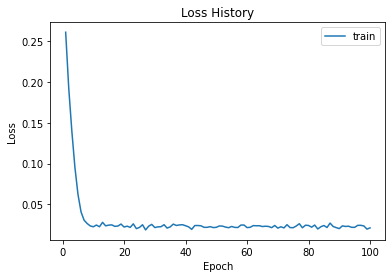

In [ ]:
# visualize loss history to get how many optimum epoch
  # Get training and test loss histories
  training_loss_univariate = modelfit_univariate.history['loss']
  # valid_loss_univariate = modelfit_univariate.history['val_loss']
  # Create count of the number of epochs
  epoch_count_univariate = range(1, len(training_loss_univariate) + 1)

  # Visualize loss history
  plt.plot(epoch_count_univariate, training_loss_univariate, label='train')
  # plt.plot(epoch_count_univariate, valid_loss_univariate, label='val')
  plt.title('Loss History')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

2. Applied model to data testing

inputs_univariate have (n_timestep + n) row of data which is consist of :
- last n_timestep row of data training
- n row of data testing

knapa ditambah n_timestep terakhir? untuk dapat memprediksi value pertama di data testing, butuh n_timestep (tergantung settingan timestep) data ke belakang kann

In [ ]:
# define inputs for data testing
  dataset_total_univariate = pd.concat((data_training_univariate, data_testing_univariate), axis = 0, sort='True')
  test_input_univariate = dataset_total_univariate[len(dataset_total_univariate) - len(data_testing_univariate) - n_timestep:].values
  test_input_univariate = test_input_univariate.reshape(-1,1) #Jadiin Matriks, Sebelumnya Vektor
  test_input_univariate = saham_normalizer.transform(test_input_univariate)

In [ ]:
saham_ASII_datatesting_input_univariate = []
for i in range(n_timestep, len(test_input_univariate)):
    saham_ASII_datatesting_input_univariate.append(test_input_univariate[i-n_timestep:i, 0])
saham_ASII_datatesting_input_univariate = np.array(saham_ASII_datatesting_input_univariate)
saham_ASII_datatesting_input_univariate = saham_ASII_datatesting_input_univariate.reshape((saham_ASII_datatesting_input_univariate.shape[0], saham_ASII_datatesting_input_univariate.shape[1], n_features_univariate))

# apply prediction to data testing
datatesting_predicted_univariate = model_univariate.predict(saham_ASII_datatesting_input_univariate)
# denormalization forecast result 
datatesting_predicted_univariate = saham_normalizer.inverse_transform(datatesting_predicted_univariate) 

# combine with actual data
predicted_result_univariate = combineWithActual(actual= data_aktual, forecast= datatesting_predicted_univariate)
predicted_result_univariate

,tanggal,Harga Saham Aktual,Harga Saham Prediksi
1,"Dec 31, 2018",8225.0,7864.986816
2,"Jan 01, 2019",8225.0,7864.986816
3,"Jan 02, 2019",8200.0,7864.986816
4,"Jan 03, 2019",8375.0,7852.178711
5,"Jan 04, 2019",8350.0,7941.835938
...,...,...,...
192,"Sep 24, 2019",6475.0,7045.266602
193,"Sep 25, 2019",6500.0,6968.417969
194,"Sep 26, 2019",6700.0,6981.226074
195,"Sep 27, 2019",6650.0,7083.690918


In [ ]:
# # write to excel
# predicted_result_univariate.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Testing/Univariate/" + modelname + ".xlsx") 

In [ ]:
predict_visualization_datatesting_univariate = predicted_result_univariate.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_datatesting_univariate = px.line(predict_visualization_datatesting_univariate, x='tanggal' , y='value' , color='variable')
fig_predict_datatesting_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk. (Data Testing)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_datatesting_univariate.show()

In [ ]:
# MAPE
nilaiMAPE_univariate = MAPE(predicted_result_univariate['Harga Saham Aktual'], predicted_result_univariate['Harga Saham Prediksi'])
print('Nilai MAPE Data Testing: %.2f' % (nilaiMAPE_univariate))

Nilai MAPE Data Testing: 3.17




> Forecast PT Astra International Tbk.'s Stock (With Currency Variable)



In [ ]:
# remove tanggal on data
dataset_ASII_multivariate = dataset_ASII.copy()
dataset_ASII_multivariate

In [ ]:
data_train_ASII_multivariate , data_test_ASII_multivariate = split_dataset(data = dataset_ASII_multivariate, 
                                                                           trainingsize= training_size)

# reset index to 1
data_train_ASII_multivariate , data_test_ASII_multivariate = data_train_ASII_multivariate.reset_index(drop=True) , data_test_ASII_multivariate.reset_index(drop=True)
# start index from 1
data_train_ASII_multivariate.index, data_test_ASII_multivariate.index = data_train_ASII_multivariate.index + 1 , data_test_ASII_multivariate.index + 1

In [ ]:
data_train_ASII_multivariate

,harga_kurs,saham_ASII
1,12127.5,7000.0
2,12150.0,6600.0
3,12176.5,6600.0
4,12210.0,6725.0
5,12202.5,6800.0
...,...,...
909,13740.0,7225.0
910,13742.0,7300.0
911,13763.0,7100.0
912,13765.0,7300.0


In [ ]:
# normalization
saham_normalized, kurs_normalized, saham_normalizer, kurs_normalizer = featureScaling(
                                                                          data= data_train_ASII_multivariate, 
                                                                          stockname ='saham_ASII',
                                                                          input_type= 'multivariate'
                                                                        )

In [ ]:
# convert to [rows, columns] structure
saham_input_multivariate = saham_normalized.reshape((len(saham_normalized), 1))
kurs_input_multivariate = kurs_normalized.reshape((len(kurs_normalized), 1))

# combine features by horizontally
features_input_multivariate = hstack((kurs_input_multivariate, saham_input_multivariate))

In [ ]:
train_input_multivariate, train_output_multivariate = getInputOutput(data= features_input_multivariate,
                                                                      trainsubset_size= len(data_train_ASII_multivariate),
                                                                      input_type = 'multivariate'
                                                                    )

In [ ]:
for i in range(len(train_input_multivariate)):
	print(train_input_multivariate[i], train_output_multivariate[i])

NOTE !!

  **Batch size** is a **number of samples processed before the model is updated**.

  **Epoch** is the **number of complete passes through the training dataset**.

  The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

  Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

  This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

  This also means that one epoch will involve 40 batches or 40 updates to the model.

  With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

1. Build model with train subset

In [ ]:
# setup model parameter
n_hiddenlayerunits = 2 * train_input_multivariate.shape[1] # define how many units in hidden layer
dropout_rate = 0.1 # Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.
#recurrent_dropout_rate = 0.1 # Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.
n_outputlayerunits = 1 # define how many units in output layer
n_epochs = 100 # epoch iteration
n_batchSize = 32 # buat apa ya lupa
activation_type = "relu"
optimizer_type = "rmsprop"
modelname = "T11"

In [ ]:
# build model to training subset
# Initialising the RNN
model_multivariate = Sequential()

# units is how many hidden layer
model_multivariate.add(SimpleRNN(
                          units = n_hiddenlayerunits, 
                          input_shape = (train_input_multivariate.shape[1] , train_input_multivariate.shape[2]), 
                          activation = activation_type, 
                          dropout = dropout_rate
                        )
                      ) 

# Adding the output layer
model_multivariate.add(Dense(units = n_outputlayerunits))

# Compiling the RNN
model_multivariate.compile(loss='mean_squared_error', optimizer=optimizer_type)

model_multivariate.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 12)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


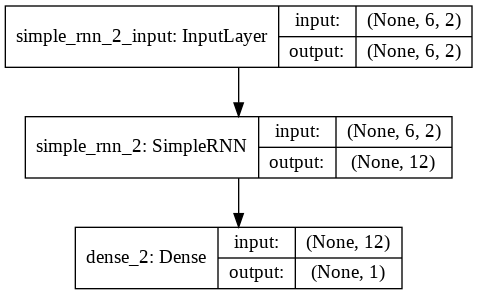

In [ ]:
plot_model(model_multivariate, to_file='/content/drive/My Drive/KULIAH/TA/TA/Documentation/model_multi_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
# build model to training subset
  # Initialising the RNN
  model_multivariate = Sequential()

  # units is how many hidden layer
  model_multivariate.add(SimpleRNN(
                          units = n_hiddenlayerunits, 
                          input_shape = (train_input_multivariate.shape[1] , train_input_multivariate.shape[2]), 
                          activation = activation_type, 
                          dropout = dropout_rate
                        )
                      ) 

  # Adding the output layer
  model_multivariate.add(Dense(units = n_outputlayerunits))

  # Compiling the RNN
  model_multivariate.compile(loss='mean_squared_error', optimizer=optimizer_type)

  #model.summary()

  # Fitting the RNN to the Training set
  start_time = time.time()
  modelfit_multivariate = model_multivariate.fit(
      train_input_multivariate, # independent features to predict
      train_output_multivariate, # dependent features to predict
      epochs = n_epochs, # number of complete passes through the training dataset
      batch_size = n_batchSize, # number of samples processed before the model is updated
      validation_split=0.3 # split data training into training : validation
      # verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
  )
  print("Running Time Model : --- %s seconds ---" % (time.time() - start_time))

Train on 638 samples, validate on 274 samples
Epoch 1/100
638/638 [==============================] - 1s 1ms/step - loss: 0.2556 - val_loss: 0.5154
Epoch 2/100
638/638 [==============================] - 0s 69us/step - loss: 0.2252 - val_loss: 0.4659
Epoch 3/100
638/638 [==============================] - 0s 66us/step - loss: 0.1965 - val_loss: 0.4191
Epoch 4/100
638/638 [==============================] - 0s 63us/step - loss: 0.1736 - val_loss: 0.3726
Epoch 5/100
638/638 [==============================] - 0s 60us/step - loss: 0.1490 - val_loss: 0.3268
Epoch 6/100
638/638 [==============================] - 0s 61us/step - loss: 0.1267 - val_loss: 0.2827
Epoch 7/100
638/638 [==============================] - 0s 67us/step - loss: 0.1032 - val_loss: 0.2409
Epoch 8/100
638/638 [==============================] - 0s 61us/step - loss: 0.0839 - val_loss: 0.2006
Epoch 9/100
638/638 [==============================] - 0s 65us/step - loss: 0.0650 - val_loss: 0.1637
Epoch 10/100
638/638 [===============

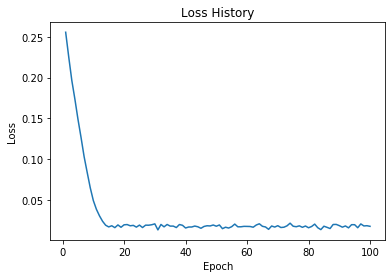

In [ ]:
# visualize loss history to get how many optimum epoch
  # Get training and test loss histories
  training_loss_multivariate = modelfit_multivariate.history['loss']
  
  # Create count of the number of epochs
  epoch_count_multivariate = range(1, len(training_loss_multivariate) + 1)

  # Visualize loss history
  plt.plot(epoch_count_multivariate, training_loss_multivariate)
  #plt.plot(epoch_count, test_loss, 'b-')
  plt.title('Loss History')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

In [ ]:
# make data structure which is consist of all data testing + last 60 row of data training
  dataset_total_multivariate = pd.concat((data_train_ASII_multivariate, data_test_ASII_multivariate), axis = 0)
  inputs_multivariate = dataset_total_multivariate[len(dataset_total_multivariate) - len(data_test_ASII_multivariate) - n_timestep:]
  inputs_multivariate = inputs_multivariate.reset_index(drop=True) # drop index column
  inputs_multivariate.index = inputs_multivariate.index + 1 # start index from 1
  inputs_multivariate

In [ ]:
# data testing normalization
 # harga saham
    saham_inputs_multivariate_normalized = saham_normalizer.transform(inputs_multivariate[['saham_ASII']])
    
 # harga kurs
    kurs_inputs_multivariate_normalized = kurs_normalizer.transform(inputs_multivariate[['harga_kurs']])

In [ ]:
# convert to [rows, columns] structure
saham_input_test_multivariate = saham_inputs_multivariate_normalized.reshape((len(saham_inputs_multivariate_normalized), 1))
kurs_input_test_multivariate = kurs_inputs_multivariate_normalized.reshape((len(kurs_inputs_multivariate_normalized), 1))

# combine features by horizontally
features_input_test_multivariate = hstack((kurs_input_test_multivariate, saham_input_test_multivariate))

In [ ]:
input_multivariate = []
for i in range(n_timestep, len(features_input_test_multivariate)):
    input_multivariate.append(features_input_test_multivariate[i-n_timestep:i, : ])#[i-n_timestep:i, : ])
input_multivariate = np.array(input_multivariate)
input_multivariate = input_multivariate.reshape((input_multivariate.shape[0], input_multivariate.shape[1], n_features_multivariate))

# apply prediction to data validation
predicted_multivariate = model_multivariate.predict(input_multivariate) 
predicted_multivariate = saham_normalizer.inverse_transform(predicted_multivariate) # denormalization forecast result

# combine with actual data
predicted_result_multivariate = combineWithActual(actual= data_aktual, forecast= predicted_multivariate)
predicted_result_multivariate

In [ ]:
predicted_result_multivariate_visualization = predicted_result_multivariate.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_multivariate = px.line(predicted_result_multivariate_visualization, x='tanggal' , y='value' , color='variable')
fig_predict_multivariate.update_layout(
    title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk. (Data Training)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_multivariate.show()

In [ ]:
# MAPE
nilaiMAPE_multivariate = MAPE(predicted_result_multivariate['Harga Saham Aktual'], predicted_result_multivariate['Harga Saham Prediksi'])
print('Nilai MAPE Model Multivariate: %.2f' % (nilaiMAPE_multivariate))

Nilai MAPE Model Multivariate: 11.61


# Forecasting Another Dataset Using Elman-RNN's best model

In [ ]:
# how many feature to be predicted?
n_features_univariate = 1
n_features_multivariate = 2

In [ ]:
# setup with best univariate model parameter
n_hiddenlayerunits_univariate = 30
dropout_rate_univariate = 0.1
n_epochs_univariate = 50
n_batchSize_univariate = 64
activation_type_univariate = 'softsign'
optimizer_type_univariate = 'rmsprop'

# setup with best multivariate model parameter
n_hiddenlayerunits_multivariate = 52
dropout_rate_multivariate = 0.1
n_outputlayerunits_multivariate = 1
n_epochs_multivariate = 50
n_batchSize_multivariate = 32
activation_type_multivariate = "tanh"
optimizer_type_multivariate = "rmsprop"



> Forecast Medco Energi Internasional Tbk's Stock



Stock Only (Univariate)

In [ ]:
n_timestep = 10

In [ ]:
dataset_MEDC_univariate = dataset_MEDC.drop(columns='harga_kurs')

In [ ]:
# split into data training : data testing
data_train_MEDC_univariate, data_test_MEDC_univariate = split_dataset(data=dataset_MEDC_univariate, 
                                                                            trainingsize=training_size)

In [ ]:
# feature scaling
saham_MEDC_normalized, saham_MEDC_normalizer = featureScaling(data = data_train_MEDC_univariate, 
                                                              stockname= 'saham_MEDC',
                                                              input_type= 'univariate')

In [ ]:
train_MEDC_input_univariate, train_MEDC_output_univariate = getInputOutput(
                                                    data= saham_MEDC_normalized, 
                                                    trainsubset_size= len(data_train_MEDC_univariate), 
                                                    input_type= 'univariate'
                                                  )
# reshape into [ samples, timestep, how many features to predict]
train_MEDC_input_univariate = train_MEDC_input_univariate.reshape((train_MEDC_input_univariate.shape[0], train_MEDC_input_univariate.shape[1], n_features_univariate))

In [ ]:
for i in range(len(train_MEDC_input_univariate)):
	print(train_MEDC_input_univariate[i], train_MEDC_output_univariate[i])

In [ ]:
# build model to training subset
  # Initialising the RNN
  best_model_univariate = Sequential()

  # units is how many hidden layer
  best_model_univariate.add(SimpleRNN(
                          units = n_hiddenlayerunits_univariate, 
                          input_shape = (train_MEDC_input_univariate.shape[1] , train_MEDC_input_univariate.shape[2]), 
                          activation = activation_type_univariate, 
                          dropout = dropout_rate_univariate
                        )
                      ) 

  # Adding the output layer
  best_model_univariate.add(Dense(units = 1))

  # Compiling the RNN
  best_model_univariate.compile(loss='mean_squared_error', optimizer=optimizer_type_univariate)

  #model.summary()

  # Fitting the RNN to the Training set
  start_time = time.time()
  modelfit_univariate = best_model_univariate.fit(
      train_MEDC_input_univariate, # independent features to predict
      train_MEDC_output_univariate, # dependent features to predict
      epochs = n_epochs_univariate, # number of complete passes through the training dataset
      batch_size = n_batchSize_univariate, # number of samples processed before the model is updated
      validation_split=0.3
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
  )
  runningtime = time.time() - start_time
  print("Running Time Model : --- %s seconds ---" % runningtime)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Train on 632 samples, validate on 271 samples
Epoch 1/50





632/632 [==============================] - 1s 1ms/step - loss: 0.0975 - val_loss: 0.0168
Epoch 2/50
632/632 [==============================] - 0s 55us/step - loss: 0.0356 - val_loss: 0.0092
Epoch 3/50
632/632 [==============================] - 0s 50us/step - loss: 0.0244 - val_loss: 0.0018
Epoch 4/50
632/632 [==============================] - 0s 53us/step - loss: 0.0252 - val_loss: 0.0036
Epoch 5/50
632/632 [==============================] - 0s 52us/step - loss: 0.0243 - val_loss: 0.0077
Epoch 6/50
632/632 [==============================] - 0s 52us/step - loss: 0.0191 - val_loss: 0.0065
Epoch 7/50
632/632 [==============================] - 0s 51us/step - loss: 0.0261 - val_loss: 0.0079
Epoch 8/50
632/632 [==============================] - 0s 51us/step - loss: 0.0211 - val_loss: 0.0075
Epoch 9/50
632/632 

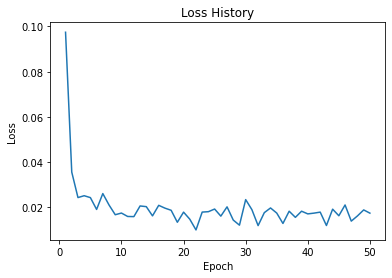

In [ ]:
# visualize loss history to get how many optimum epoch
  # Get training and test loss histories
  training_loss_univariate = modelfit_univariate.history['loss']
  
  # Create count of the number of epochs
  epoch_count_univariate = range(1, len(training_loss_univariate) + 1)

  # Visualize loss history
  plt.plot(epoch_count_univariate, training_loss_univariate)
  #plt.plot(epoch_count, test_loss, 'b-')
  plt.title('Loss History')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

In [ ]:
# define inputs for data testing
  dataset_total_MEDC = pd.concat((data_train_MEDC_univariate, data_test_MEDC_univariate), axis = 0)
  test_input_univariate = dataset_total_MEDC[len(dataset_total_MEDC) - len(data_test_MEDC_univariate) - n_timestep:].values
  test_input_univariate = test_input_univariate.reshape(-1,1)
  test_input_univariate = saham_MEDC_normalizer.transform(test_input_univariate)

In [ ]:
saham_MEDC_datatesting_input_univariate = []
for i in range(n_timestep, len(test_input_univariate)):
    saham_MEDC_datatesting_input_univariate.append(test_input_univariate[i-n_timestep:i, 0])
saham_MEDC_datatesting_input_univariate = np.array(saham_MEDC_datatesting_input_univariate)
saham_MEDC_datatesting_input_univariate = saham_MEDC_datatesting_input_univariate.reshape(
    (saham_MEDC_datatesting_input_univariate.shape[0], 
     saham_MEDC_datatesting_input_univariate.shape[1], 
     n_features_univariate))

# apply prediction to data testing
datatesting_MEDC_predicted_univariate = best_model_univariate.predict(saham_MEDC_datatesting_input_univariate) 
datatesting_MEDC_predicted_univariate = saham_MEDC_normalizer.inverse_transform(datatesting_MEDC_predicted_univariate) # denormalization forecast result

# combine with actual data
predicted_result_univariate_MEDC = combineWithActual(actual= data_aktual_MEDC, forecast= datatesting_MEDC_predicted_univariate)
predicted_result_univariate_MEDC

,tanggal,Harga Saham Aktual,Harga Saham Prediksi
1,"Apr 02, 2018",1225.0,1155.260498
2,"Apr 03, 2018",1205.0,1162.312866
3,"Apr 04, 2018",1145.0,1165.637573
4,"Apr 05, 2018",1165.0,1143.426147
5,"Apr 06, 2018",1180.0,1124.671997
...,...,...,...
387,"Sep 24, 2019",720.0,747.962402
388,"Sep 25, 2019",720.0,738.678223
389,"Sep 26, 2019",730.0,731.650879
390,"Sep 27, 2019",720.0,734.424866


In [ ]:
predicted_result_univariate_MEDC.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/MEDC Univariate Prediction.xlsx")

In [ ]:
predict_visualization_datatesting_univariate = predicted_result_univariate_MEDC.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_datatesting_univariate = px.line(predict_visualization_datatesting_univariate, x='tanggal' , y='value' , color='variable')
fig_predict_datatesting_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Medco Energi Internasional Tbk.",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_datatesting_univariate.show()

In [ ]:
# MAPE
nilaiMAPE_MEDCO_univariate = MAPE(predicted_result_univariate_MEDC['Harga Saham Aktual'], predicted_result_univariate_MEDC['Harga Saham Prediksi'])
print('Nilai MAPE Data Testing: %.2f' % (nilaiMAPE_MEDCO_univariate))

Nilai MAPE Data Testing: 3.03


With Dollar Currency Feature (Multivariate)

In [ ]:
n_timestep = 9

In [ ]:
# remove tanggal on data
dataset_MEDC_multivariate = dataset_MEDC.copy()

In [ ]:
data_train_MEDC_multivariate , data_test_MEDC_multivariate = split_dataset(data = dataset_MEDC_multivariate, 
                                                                           trainingsize= training_size)

# reset index to 1
data_train_MEDC_multivariate , data_test_MEDC_multivariate = data_train_MEDC_multivariate.reset_index(drop=True) , data_test_MEDC_multivariate.reset_index(drop=True)
# start index from 1
data_train_MEDC_multivariate.index, data_test_MEDC_multivariate.index = data_train_MEDC_multivariate.index + 1 , data_test_MEDC_multivariate.index + 1

In [ ]:
# normalization
saham_MEDC_multivariate_normalized, kurs_multivariate_normalized, saham_MEDC_multivariate_normalizer, kurs_multivariate_normalizer = featureScaling(data_train_MEDC_multivariate, 
                                                                                                                                                    'saham_MEDC',
                                                                                                                                                    input_type= 'multivariate')

In [ ]:
# convert to [rows, columns] structure
saham_MEDC_input_multivariate = saham_MEDC_multivariate_normalized.reshape((len(saham_MEDC_multivariate_normalized), 1))
kurs_MEDC_input_multivariate = kurs_multivariate_normalized.reshape((len(kurs_multivariate_normalized), 1))

# combine features by horizontally
features_input_MEDC_multivariate = hstack((kurs_MEDC_input_multivariate, saham_MEDC_input_multivariate))

In [ ]:
train_input_MEDC_multivariate, train_output_MEDC_multivariate = getInputOutput(data= features_input_MEDC_multivariate,
                                                                      trainsubset_size= len(data_train_MEDC_multivariate),
                                                                      input_type = 'multivariate'
                                                                    )

In [ ]:
for i in range(len(train_input_MEDC_multivariate)):
	print(train_input_MEDC_multivariate[i], train_output_MEDC_multivariate[i])

In [ ]:
# build model to training subset
# Initialising the RNN
model_multivariate = Sequential()

# units is how many hidden layer
model_multivariate.add(SimpleRNN(
                          units = n_hiddenlayerunits_multivariate, 
                          input_shape = (train_input_MEDC_multivariate.shape[1] , train_input_MEDC_multivariate.shape[2]), 
                          activation = activation_type_multivariate, 
                          dropout = dropout_rate_multivariate
                        )
                      ) 

# Adding the output layer
model_multivariate.add(Dense(units = n_outputlayerunits_multivariate))

# Compiling the RNN
model_multivariate.compile(loss='mean_squared_error', optimizer=optimizer_type_multivariate)

#model.summary()

# Fitting the RNN to the Training set
start_time = time.time()
modelfit_multivariate = model_multivariate.fit(
      train_input_MEDC_multivariate, # independent features to predict
      train_output_MEDC_multivariate, # dependent features to predict
      epochs = n_epochs_multivariate, # number of complete passes through the training dataset
      batch_size = n_batchSize_multivariate, # number of samples processed before the model is updated
      validation_split= valid_size # split data training into training : validation
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
  )
print("Running Time Model : --- %s seconds ---" % (time.time() - start_time))

Train on 632 samples, validate on 272 samples
Epoch 1/50
632/632 [==============================] - 0s 312us/step - loss: 0.0334 - val_loss: 0.0016
Epoch 2/50
632/632 [==============================] - 0s 91us/step - loss: 0.0342 - val_loss: 0.0019
Epoch 3/50
632/632 [==============================] - 0s 85us/step - loss: 0.0254 - val_loss: 0.0030
Epoch 4/50
632/632 [==============================] - 0s 85us/step - loss: 0.0229 - val_loss: 0.0026
Epoch 5/50
632/632 [==============================] - 0s 94us/step - loss: 0.0242 - val_loss: 0.0053
Epoch 6/50
632/632 [==============================] - 0s 85us/step - loss: 0.0268 - val_loss: 0.0026
Epoch 7/50
632/632 [==============================] - 0s 87us/step - loss: 0.0259 - val_loss: 0.0044
Epoch 8/50
632/632 [==============================] - 0s 86us/step - loss: 0.0226 - val_loss: 8.8577e-04
Epoch 9/50
632/632 [==============================] - 0s 85us/step - loss: 0.0218 - val_loss: 0.0047
Epoch 10/50
632/632 [===================

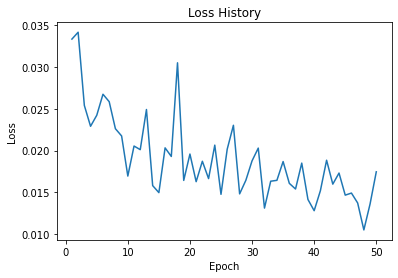

In [ ]:
# visualize loss history to get how many optimum epoch
# Get training and test loss histories
training_loss_multivariate = modelfit_multivariate.history['loss']
  
  # Create count of the number of epochs
epoch_count_multivariate = range(1, len(training_loss_multivariate) + 1)

  # Visualize loss history
plt.plot(epoch_count_multivariate, training_loss_multivariate)
  #plt.plot(epoch_count, test_loss, 'b-')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# make data structure which is consist of all data testing + last 60 row of data training
dataset_total_MEDC_multivariate = pd.concat((data_train_MEDC_multivariate, data_test_MEDC_multivariate), axis = 0)
inputs_MEDC_multivariate = dataset_total_MEDC_multivariate[len(dataset_total_MEDC_multivariate) - len(data_test_MEDC_multivariate) - n_timestep:]
inputs_MEDC_multivariate = inputs_MEDC_multivariate.reset_index(drop=True) # drop index column
inputs_MEDC_multivariate.index = inputs_MEDC_multivariate.index + 1 # start index from 1
inputs_MEDC_multivariate.head(10)

In [ ]:
# data testing normalization
 # harga saham
saham_inputs_multivariate_MEDC_normalized = saham_MEDC_multivariate_normalizer.transform(inputs_MEDC_multivariate[['saham_MEDC']])
    
 # harga kurs
kurs_inputs_multivariate_normalized = kurs_multivariate_normalizer.transform(inputs_MEDC_multivariate[['harga_kurs']])

In [ ]:
# convert to [rows, columns] structure
saham_input_test_MEDC_multivariate = saham_inputs_multivariate_MEDC_normalized.reshape((len(saham_inputs_multivariate_MEDC_normalized), 1))
kurs_input_test_multivariate = kurs_inputs_multivariate_normalized.reshape((len(kurs_inputs_multivariate_normalized), 1))

# combine features by horizontally
features_input_test_MEDC_multivariate = hstack((kurs_input_test_multivariate, saham_input_test_MEDC_multivariate))

In [ ]:
input_test_MEDC_multivariate = []
for i in range(n_timestep, len(features_input_test_MEDC_multivariate)):
    input_test_MEDC_multivariate.append(features_input_test_MEDC_multivariate[i-n_timestep:i, : ])#[i-n_timestep:i, : ])
input_test_MEDC_multivariate = np.array(input_test_MEDC_multivariate)
input_test_MEDC_multivariate = input_test_MEDC_multivariate.reshape((input_test_MEDC_multivariate.shape[0], input_test_MEDC_multivariate.shape[1], n_features_multivariate))

# apply prediction to data validation
predicted_MEDC_multivariate = model_multivariate.predict(input_test_MEDC_multivariate) 
predicted_MEDC_multivariate = saham_MEDC_multivariate_normalizer.inverse_transform(predicted_MEDC_multivariate) # denormalization forecast result

# combine with actual data
predicted_result_multivariate_MEDC = combineWithActual(actual= data_aktual_MEDC, forecast= predicted_MEDC_multivariate)
predicted_result_multivariate_MEDC

In [ ]:
predicted_result_multivariate_visualization = predicted_result_multivariate_MEDC.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_multivariate = px.line(predicted_result_multivariate_visualization, x='tanggal' , y='value' , color='variable')
fig_predict_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Medco Energi Internasional Tbk.",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_multivariate.show()

In [ ]:
# MAPE
nilaiMAPE_MEDCO_multivariate = MAPE(predicted_result_multivariate_MEDC['Harga Saham Aktual'], predicted_result_multivariate_MEDC['Harga Saham Prediksi'])
print('Nilai MAPE Model Multivariate: %s' % (nilaiMAPE_MEDCO_multivariate))

Nilai MAPE Model Multivariate: 6.381629204398995


In [ ]:
predicted_result_multivariate_MEDC.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/MEDC Multivariate Prediction.xlsx")



>  **Forecast Indofarma Tbk's Stock**



Stock Only (Univariate)

In [ ]:
n_timestep = 10

In [ ]:
dataset_INAF_univariate = dataset_INAF.drop(columns= 'harga_kurs')

In [ ]:
# split into training : testing
data_train_INAF_univariate, data_test_INAF_univariate = split_dataset(dataset_INAF_univariate, training_size)

In [ ]:
# feature scaling
saham_INAF_normalized, saham_INAF_normalizer = featureScaling(data= data_train_INAF_univariate, 
                                                              stockname= 'saham_INAF',
                                                              input_type='univariate')

In [ ]:
# get input output for modelling
train_INAF_input_univariate, train_INAF_output_univariate = getInputOutput(data= saham_INAF_normalized, 
                                                                         trainsubset_size= len(saham_INAF_normalized), 
                                                                         input_type= 'univariate')

# reshape
train_INAF_input_univariate = train_INAF_input_univariate.reshape((train_INAF_input_univariate.shape[0], train_INAF_input_univariate.shape[1], n_features_univariate))

In [ ]:
# build model to training subset
  # Initialising the RNN
  best_model_univariate = Sequential()

  # units is how many hidden layer
  best_model_univariate.add(SimpleRNN(
                          units = n_hiddenlayerunits_univariate, 
                          input_shape = (train_INAF_input_univariate.shape[1] , train_INAF_input_univariate.shape[2]), 
                          activation = activation_type_univariate, 
                          dropout = dropout_rate_univariate
                        )
                      ) 

  # Adding the output layer
  best_model_univariate.add(Dense(units = 1))

  # Compiling the RNN
  best_model_univariate.compile(loss='mean_squared_error', optimizer=optimizer_type_univariate)

  #model.summary()

  # Fitting the RNN to the Training set
  start_time = time.time()
  modelfit_univariate = best_model_univariate.fit(
      train_INAF_input_univariate, # independent features to predict
      train_INAF_output_univariate, # dependent features to predict
      epochs = n_epochs_univariate, # number of complete passes through the training dataset
      batch_size = n_batchSize_univariate, # number of samples processed before the model is updated
      validation_split=0.3
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
  )
  runningtime = time.time() - start_time
  print("Running Time Model : --- %s seconds ---" % runningtime)

Train on 632 samples, validate on 271 samples
Epoch 1/50
632/632 [==============================] - 0s 773us/step - loss: 0.0119 - val_loss: 0.0175
Epoch 2/50
632/632 [==============================] - 0s 53us/step - loss: 0.0143 - val_loss: 0.0117
Epoch 3/50
632/632 [==============================] - 0s 53us/step - loss: 0.0064 - val_loss: 0.0113
Epoch 4/50
632/632 [==============================] - 0s 52us/step - loss: 0.0049 - val_loss: 0.0138
Epoch 5/50
632/632 [==============================] - 0s 58us/step - loss: 0.0048 - val_loss: 0.0064
Epoch 6/50
632/632 [==============================] - 0s 50us/step - loss: 0.0083 - val_loss: 0.0035
Epoch 7/50
632/632 [==============================] - 0s 51us/step - loss: 0.0063 - val_loss: 0.0111
Epoch 8/50
632/632 [==============================] - 0s 51us/step - loss: 0.0076 - val_loss: 0.0042
Epoch 9/50
632/632 [==============================] - 0s 52us/step - loss: 0.0053 - val_loss: 0.0107
Epoch 10/50
632/632 [=======================

In [ ]:
# define inputs for data testing
  dataset_total_INAF = pd.concat((data_train_INAF_univariate, data_test_INAF_univariate), axis = 0)
  test_input_INAF_univariate = dataset_total_INAF[len(dataset_total_INAF) - len(data_test_INAF_univariate) - n_timestep:].values
  test_input_INAF_univariate = test_input_INAF_univariate.reshape(-1,1) #Jadiin Matriks, Sebelumnya Vektor
  test_input_INAF_univariate = saham_INAF_normalizer.transform(test_input_INAF_univariate)

In [ ]:
saham_INAF_datatesting_input_univariate = []
for i in range(n_timestep, len(test_input_INAF_univariate)):
    saham_INAF_datatesting_input_univariate.append(test_input_INAF_univariate[i-n_timestep:i, 0])
saham_INAF_datatesting_input_univariate = np.array(saham_INAF_datatesting_input_univariate)
saham_INAF_datatesting_input_univariate = saham_INAF_datatesting_input_univariate.reshape(
    (saham_INAF_datatesting_input_univariate.shape[0], 
     saham_INAF_datatesting_input_univariate.shape[1], 
     n_features_univariate))

# apply prediction to data testing
datatesting_INAF_predicted_univariate = best_model_univariate.predict(saham_INAF_datatesting_input_univariate) 
datatesting_INAF_predicted_univariate = saham_INAF_normalizer.inverse_transform(datatesting_INAF_predicted_univariate) # denormalization forecast result

# combine with actual data
predicted_result_univariate_INAF = combineWithActual(actual= data_aktual_INAF, forecast= datatesting_INAF_predicted_univariate)
predicted_result_univariate_INAF.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/INAF/Univariate Prediction.xlsx")
print(predicted_result_univariate_INAF)

In [ ]:
predict_visualization_datatesting_univariate = predicted_result_univariate_INAF.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_datatesting_univariate = px.line(predict_visualization_datatesting_univariate, x='tanggal' , y='value' , color='variable')
fig_predict_datatesting_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Indofarma Tbk.",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_datatesting_univariate.show()

In [ ]:
# MAPE
nilaiMAPE_INAF_univariate = MAPE(predicted_result_univariate_INAF['Harga Saham Aktual'], predicted_result_univariate_INAF['Harga Saham Prediksi'])
print('Nilai MAPE INAF Univariate: %.2f' % (nilaiMAPE_INAF_univariate))

Nilai MAPE INAF Univariate: 6.02


With Dollar Currency Feature (Multivariate)

In [ ]:
n_timestep = 9

In [ ]:
dataset_INAF_multivariate = dataset_INAF.copy()

In [ ]:
data_train_INAF_multivariate , data_test_INAF_multivariate = split_dataset(data = dataset_INAF_multivariate, 
                                                                           trainingsize= training_size)

# reset index to 1
data_train_INAF_multivariate , data_test_INAF_multivariate = data_train_INAF_multivariate.reset_index(drop=True) , data_test_INAF_multivariate.reset_index(drop=True)
# start index from 1
data_train_INAF_multivariate.index, data_test_INAF_multivariate.index = data_train_INAF_multivariate.index + 1 , data_test_INAF_multivariate.index + 1

In [ ]:
# normalization
saham_INAF_rnn_multivariate_normalized, kurs_INAF_rnn_multivariate_normalized, saham_INAF_rnn_multivariate_normalizer, kurs_INAF_rnn_multivariate_normalizer = featureScaling(data_train_INAF_multivariate, 
                                                                                                                                                    stockname='saham_INAF',
                                                                                                                                                    input_type= 'multivariate')

In [ ]:
# convert to [rows, columns] structure
saham_INAF_input_rnn_multivariate = saham_INAF_rnn_multivariate_normalized.reshape((len(saham_INAF_rnn_multivariate_normalized), 1))
kurs_INAF_input_rnn_multivariate = kurs_INAF_rnn_multivariate_normalized.reshape((len(kurs_INAF_rnn_multivariate_normalized), 1))

# combine features by horizontally
features_input_INAF_rnn_multivariate = hstack((kurs_INAF_input_rnn_multivariate, saham_INAF_input_rnn_multivariate))

In [ ]:
train_input_INAF_rnn_multivariate, train_output_INAF_rnn_multivariate = getInputOutput(data= features_input_INAF_rnn_multivariate,
                                                                      trainsubset_size= len(data_train_INAF_multivariate),
                                                                      input_type = 'multivariate'
                                                                    )

In [ ]:
for i in range(len(train_input_INAF_rnn_multivariate)):
	print(train_input_INAF_rnn_multivariate[i], train_output_INAF_rnn_multivariate[i])

Streaming output truncated to the last 5000 lines.
 [0.60240964 0.02631123]
 [0.59499537 0.02631123]
 [0.54216867 0.02648433]
 [0.54216867 0.03306214]] 0.03150424095551324
[[0.62557924 0.02613813]
 [0.65430955 0.02631123]
 [0.60704356 0.02631123]
 [0.60240964 0.02631123]
 [0.60240964 0.02631123]
 [0.59499537 0.02631123]
 [0.54216867 0.02648433]
 [0.54216867 0.03306214]
 [0.5523633  0.03150424]] 0.032889042755755576
[[0.65430955 0.02631123]
 [0.60704356 0.02631123]
 [0.60240964 0.02631123]
 [0.60240964 0.02631123]
 [0.59499537 0.02631123]
 [0.54216867 0.02648433]
 [0.54216867 0.03306214]
 [0.5523633  0.03150424]
 [0.50973123 0.03288904]] 0.03306214298078587
[[0.60704356 0.02631123]
 [0.60240964 0.02631123]
 [0.60240964 0.02631123]
 [0.59499537 0.02631123]
 [0.54216867 0.02648433]
 [0.54216867 0.03306214]
 [0.5523633  0.03150424]
 [0.50973123 0.03288904]
 [0.51899907 0.03306214]] 0.034273844555997926
[[0.60240964 0.02631123]
 [0.60240964 0.02631123]
 [0.59499537 0.02631123]
 [0.54216867 

In [ ]:
# initiate how many numbers of features to predict
# n_features_multivariate = train_input_INAF_multivariate.shape[2]

In [ ]:
# build model to training subset
  # Initialising the RNN
model_multivariate = Sequential()

  # units is how many hidden layer
model_multivariate.add(SimpleRNN(
                          units = n_hiddenlayerunits_multivariate, 
                          input_shape = (train_input_INAF_rnn_multivariate.shape[1] , train_input_INAF_rnn_multivariate.shape[2]), 
                          activation = activation_type_multivariate, 
                          dropout = dropout_rate_multivariate
                        )
                      ) 

  # Adding the output layer
model_multivariate.add(Dense(units = 1))

  # Compiling the RNN
model_multivariate.compile(loss='mean_squared_error', optimizer=optimizer_type_multivariate)

  #model.summary()

  # Fitting the RNN to the Training set
start_time = time.time()
modelfit_multivariate = model_multivariate.fit(
      train_input_INAF_rnn_multivariate, # independent features to predict
      train_output_INAF_rnn_multivariate, # dependent features to predict
      epochs = n_epochs_multivariate, # number of complete passes through the training dataset
      batch_size = n_batchSize_multivariate, # number of samples processed before the model is updated
      validation_split=0.3 # split data training into training : validation
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
  )
print("Running Time Model : --- %s seconds ---" % (time.time() - start_time))

Train on 632 samples, validate on 272 samples
Epoch 1/50
632/632 [==============================] - 0s 334us/step - loss: 0.0388 - val_loss: 0.0208
Epoch 2/50
632/632 [==============================] - 0s 86us/step - loss: 0.0096 - val_loss: 0.0383
Epoch 3/50
632/632 [==============================] - 0s 84us/step - loss: 0.0144 - val_loss: 0.0154
Epoch 4/50
632/632 [==============================] - 0s 84us/step - loss: 0.0100 - val_loss: 0.0092
Epoch 5/50
632/632 [==============================] - 0s 85us/step - loss: 0.0128 - val_loss: 0.0085
Epoch 6/50
632/632 [==============================] - 0s 100us/step - loss: 0.0107 - val_loss: 0.0148
Epoch 7/50
632/632 [==============================] - 0s 100us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 8/50
632/632 [==============================] - 0s 98us/step - loss: 0.0076 - val_loss: 0.0137
Epoch 9/50
632/632 [==============================] - 0s 97us/step - loss: 0.0094 - val_loss: 0.0168
Epoch 10/50
632/632 [=====================

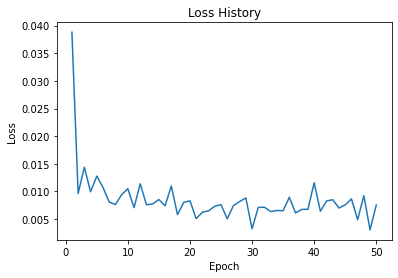

In [ ]:
# visualize loss history to get how many optimum epoch
  # Get training and test loss histories
training_loss_multivariate = modelfit_multivariate.history['loss']
  
  # Create count of the number of epochs
epoch_count_multivariate = range(1, len(training_loss_multivariate) + 1)

  # Visualize loss history
plt.plot(epoch_count_multivariate, training_loss_multivariate)
  #plt.plot(epoch_count, test_loss, 'b-')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# make data structure which is consist of all data testing + last 60 row of data training
dataset_total_INAF_multivariate = pd.concat((data_train_INAF_multivariate, data_test_INAF_multivariate), axis = 0)
inputs_INAF_rnn_multivariate = dataset_total_INAF_multivariate[len(dataset_total_INAF_multivariate) - len(data_test_INAF_multivariate) - n_timestep:]
inputs_INAF_rnn_multivariate = inputs_INAF_rnn_multivariate.reset_index(drop=True) # drop index column
inputs_INAF_rnn_multivariate.index = inputs_INAF_rnn_multivariate.index + 1 # start index from 1

In [ ]:
# data testing normalization
 # harga saham
saham_inputs_rnn_multivariate_INAF_normalized = saham_INAF_rnn_multivariate_normalizer.transform(inputs_INAF_rnn_multivariate[['saham_INAF']])
    
 # harga kurs
kurs_inputs_rnn_multivariate_normalized = kurs_INAF_rnn_multivariate_normalizer.transform(inputs_INAF_rnn_multivariate[['harga_kurs']])

In [ ]:
# convert to [rows, columns] structure
saham_input_test_INAF_rnn_multivariate = saham_inputs_rnn_multivariate_INAF_normalized.reshape((len(saham_inputs_rnn_multivariate_INAF_normalized), 1))
kurs_input_test_rnn_multivariate = kurs_inputs_rnn_multivariate_normalized.reshape((len(kurs_inputs_rnn_multivariate_normalized), 1))

# combine features by horizontally
features_input_test_INAF_rnn_multivariate = hstack((kurs_input_test_rnn_multivariate, saham_input_test_INAF_rnn_multivariate))

In [ ]:
input_test_INAF_rnn_multivariate = []
for i in range(n_timestep, len(features_input_test_INAF_rnn_multivariate)):
    input_test_INAF_rnn_multivariate.append(features_input_test_INAF_rnn_multivariate[i-n_timestep:i, : ])
input_test_INAF_rnn_multivariate = np.array(input_test_INAF_rnn_multivariate)
input_test_INAF_rnn_multivariate = input_test_INAF_rnn_multivariate.reshape((input_test_INAF_rnn_multivariate.shape[0], input_test_INAF_rnn_multivariate.shape[1], 2))

# apply prediction to data validation
predicted_INAF_rnn_multivariate = model_multivariate.predict(input_test_INAF_rnn_multivariate) 
predicted_INAF_rnn_multivariate = saham_INAF_rnn_multivariate_normalizer.inverse_transform(predicted_INAF_rnn_multivariate) # denormalization forecast result

# combine with actual data
predicted_result_multivariate_INAF = combineWithActual(actual= data_aktual_INAF, forecast= predicted_INAF_rnn_multivariate)
predicted_result_multivariate_INAF

In [ ]:
predicted_result_multivariate_visualization = predicted_result_multivariate_INAF.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_multivariate = px.line(predicted_result_multivariate_visualization, x='tanggal' , y='value' , color='variable')
fig_predict_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Medco Energi Internasional Tbk. (Dengan Pengaruh Variabel Kurs Dollar)",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_multivariate.show()

In [ ]:
# MAPE
nilaiMAPE_INAF_rnn_multivariate = MAPE(predicted_result_multivariate_INAF['Harga Saham Aktual'], predicted_result_multivariate_INAF['Harga Saham Prediksi'])
print('Nilai MAPE Model Multivariate: %.3f' % (nilaiMAPE_INAF_rnn_multivariate))

Nilai MAPE Model Multivariate: 4.466


In [ ]:
# write to excel
predicted_result_multivariate_INAF.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/INAF Multivariate Prediction.xlsx")

# Building Artificial Neural Network Forecasting Model **(As Comparison)**

Forecast PT. Astra International's Stock Only (Univariate)

In [ ]:
# define timestep
n_timestep = 6

In [ ]:
dataset_ASII_univariate = dataset_ASII.drop(columns = 'harga_kurs')

In [ ]:
# how many feature to be predicted?
n_features_univariate = 1

Cek manual untuk mengetahui kapan konvergen error nya

In [ ]:
# split into data training : data testing
data_train_ASII_univariate, data_test_ASII_univariate = split_dataset(data=dataset_ASII_univariate, 
                                                                      trainingsize=training_size)

In [ ]:
saham_ASII_univariate_mlp_normalized, saham_ASII_mlp_univariate_normalizer = featureScaling(data_train_ASII_univariate, 
                                              stockname= 'saham_ASII', 
                                              input_type= 'univariate')

In [ ]:
train_input_ASII_mlp_univariate, train_output_ASII_mlp_univariate = getInputOutput(
                                                    data= saham_ASII_univariate_mlp_normalized, 
                                                    trainsubset_size= len(data_train_ASII_univariate), 
                                                    input_type= 'univariate'
                                                  )

In [ ]:
for i in range(len(train_input_ASII_mlp_univariate)):
  print(train_input_ASII_mlp_univariate[i], train_output_ASII_mlp_univariate[i])

1. Build model with train subset

In [ ]:
model_MLP = Sequential()

# units is how many hidden layer
model_MLP.add(Dense(
                      units = n_hiddenlayerunits_univariate, 
                      input_dim = n_timestep, 
                      activation = activation_type_univariate,
                    )
                ) 
model_MLP.add(Dropout(dropout_rate_univariate))

# Adding the output layer
model_MLP.add(Dense(units = 1))

# Compiling the RNN
model_MLP.compile(loss='mean_squared_error', optimizer=optimizer_type_univariate)

#model.summary()

# Fitting the RNN to the Training set
start_time = time.time()
modelfit_univariate = model_MLP.fit(
      train_input_ASII_mlp_univariate, # independent features to predict
      train_output_ASII_mlp_univariate, # dependent features to predict
      epochs = n_epochs_univariate, # number of complete passes through the training dataset
      batch_size = n_batchSize_univariate, # number of samples processed before the model is updated
      validation_split=0.3
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Train on 632 samples, validate on 271 samples
Epoch 1/50
632/632 [==============================] - 1s 2ms/step - loss: 0.0531 - val_loss: 0.0162
Epoch 2/50
632/632 [==============================] - 0s 34us/step - loss: 0.0236 - val_loss: 0.0096
Epoch 3/50
632/632 [==============================] - 0s 32us/step - loss: 0.0202 - val_loss: 0.0134
Epoch 4/50
632/632 [==============================] - 0s 36us/step - loss: 0.0190 - val_loss: 0.0131
Epoch 5/50
632/632 [==============================] - 0s 30us/step - loss: 0.0183 - val_loss: 0.0116
Epoch 6/50
632/632 [==============================] - 0s 32us/step - loss: 0.0158 - val_loss: 0.0054
Epoch 7/50
632/632 [==============================] - 0s 29us/step - loss: 0.0141 - val_loss: 0.0057
Epoch 8/50
632/632 [==============================] - 0s 30us/step - loss: 0.0136 - val_loss: 0.0139
Epoch 9/50
632/632 [==============================] - 0s 25us/step - loss: 0.0138 - val_loss: 0.0045
Epoch 10/50
632/632 [=========================

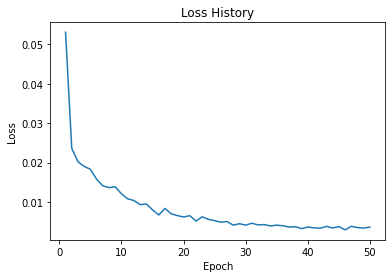

In [ ]:
# visualize loss history to get how many optimum epoch
  # Get training and test loss histories
  training_loss_univariate = modelfit_univariate.history['loss']

  # Create count of the number of epochs
  epoch_count_univariate = range(1, len(training_loss_univariate) + 1)

  # Visualize loss history
  plt.plot(epoch_count_univariate, training_loss_univariate)
  #plt.plot(epoch_count, test_loss, 'b-')
  plt.title('Loss History')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

2. Applied model to data testing

inputs_univariate have (n_timestep + n) row of data which is consist of :
- last n_timestep row of data training
- n row of data testing

knapa ditambah n_timestep terakhir? untuk dapat memprediksi value pertama di data testing, butuh n_timestep (tergantung settingan timestep) data ke belakang kann

In [ ]:
# define inputs for data testing
  dataset_total_univariate = pd.concat((data_train_ASII_univariate, data_test_ASII_univariate), axis = 0, sort='True')
  test_input_mlp_univariate = dataset_total_univariate[len(dataset_total_univariate) - len(data_test_ASII_univariate) - n_timestep:].values
  test_input_mlp_univariate = test_input_mlp_univariate.reshape(-1,1) #Jadiin Matriks, Sebelumnya Vektor
  test_input_mlp_univariate = saham_ASII_mlp_univariate_normalizer.transform(test_input_mlp_univariate)

In [ ]:
saham_ASII_input_mlp_univariate = []
for i in range(n_timestep, len(test_input_mlp_univariate)):
    saham_ASII_input_mlp_univariate.append(test_input_mlp_univariate[i-n_timestep:i, 0])
saham_ASII_input_mlp_univariate = np.array(saham_ASII_input_mlp_univariate)

# apply prediction to data testing
predicted_ASII_mlp_univariate = model_MLP.predict(saham_ASII_input_mlp_univariate) 
predicted_ASII_mlp_univariate = saham_ASII_mlp_univariate_normalizer.inverse_transform(predicted_ASII_mlp_univariate) # denormalization forecast result

# combine with actual data
predicted_result_univariate = combineWithActual(actual= data_aktual, forecast= predicted_ASII_mlp_univariate)
predicted_result_univariate

,tanggal,Harga Saham Aktual,Harga Saham Prediksi
1,"Apr 02, 2018",7550.0,7194.629395
2,"Apr 03, 2018",7675.0,7402.976074
3,"Apr 04, 2018",7575.0,7479.745605
4,"Apr 05, 2018",7600.0,7566.671875
5,"Apr 06, 2018",7525.0,7518.430664
...,...,...,...
387,"Sep 24, 2019",6475.0,6568.161621
388,"Sep 25, 2019",6500.0,6546.048828
389,"Sep 26, 2019",6700.0,6457.976562
390,"Sep 27, 2019",6650.0,6597.416016


In [ ]:
# # write to excel
predicted_result_univariate.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Metode Lain/ASII MLP Univariate Prediction.xlsx")

In [ ]:
predict_visualization_datatesting_univariate = predicted_result_univariate.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_datatesting_univariate = px.line(predict_visualization_datatesting_univariate, x='tanggal' , y='value' , color='variable')
fig_predict_datatesting_univariate.update_layout(
    title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk. (Data Testing)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_datatesting_univariate.show()

In [ ]:
# # MAPE
# nilaiMAPE_univariate = MAPE(predicted_result_univariate['Harga Saham Aktual'], predicted_result_univariate['Harga Saham Prediksi'])
# print('Nilai MAPE Data Testing: %.2f' % (nilaiMAPE_univariate))

# MAPE
nilaiMAPE_ASII_mlp_univariate = MAPE(predicted_result_univariate['Harga Saham Aktual'], predicted_result_univariate['Harga Saham Prediksi'])
print('Nilai MAPE ASII Multilayer Perceptron Univariate: %s' % (nilaiMAPE_ASII_mlp_univariate))

Nilai MAPE ASII Multilayer Perceptron Univariate: 1.8349765212391072


Forecast PT. Astra International's Stock with Currency Feature (Multivariate)

In [ ]:
n_timestep = 6

In [ ]:
# remove tanggal on data
dataset_ASII_multivariate = dataset_ASII.copy()

In [ ]:
data_train_ASII_multivariate , data_test_ASII_multivariate = split_dataset(data = dataset_ASII_multivariate, 
                                                                           trainingsize= training_size)

# reset index to 1
data_train_ASII_multivariate , data_test_ASII_multivariate = data_train_ASII_multivariate.reset_index(drop=True) , data_test_ASII_multivariate.reset_index(drop=True)
# start index from 1
data_train_ASII_multivariate.index, data_test_ASII_multivariate.index = data_train_ASII_multivariate.index + 1 , data_test_ASII_multivariate.index + 1

In [ ]:
# normalization
saham_ASII_mlp_multivariate_normalized, kurs_ASII_mlp_normalized, saham_ASII_mlp_multivariate_normalizer, kurs_ASII_mlp_normalizer = featureScaling(
                                                                          data= data_train_ASII_multivariate, 
                                                                          stockname ='saham_ASII',
                                                                          input_type= 'multivariate'
                                                                        )

In [ ]:
# convert to [rows, columns] structure
saham_input_mlp_multivariate = saham_ASII_mlp_multivariate_normalized.reshape((len(saham_ASII_mlp_multivariate_normalized), 1))
kurs_input_mlp_multivariate = kurs_ASII_mlp_normalized.reshape((len(kurs_ASII_mlp_normalized), 1))

# combine features by horizontally
features_input_ASII_mlp_multivariate = hstack((kurs_input_mlp_multivariate, saham_input_mlp_multivariate))

In [ ]:
train_input_ASII_mlp_multivariate, train_output_ASII_mlp_multivariate = getInputOutput(data= features_input_ASII_mlp_multivariate,
                                                                      trainsubset_size= len(data_train_ASII_multivariate),
                                                                      input_type = 'multivariate'
                                                                    )

In [ ]:
for i in range(len(train_input_ASII_mlp_multivariate)):
	print(train_input_ASII_mlp_multivariate[i], train_output_ASII_mlp_multivariate[i])

Streaming output truncated to the last 5000 lines.
 [0.22928638 0.57142857]] 0.5776397515527951
[[0.22150139 0.50931677]
 [0.22724745 0.47826087]
 [0.20759963 0.53416149]
 [0.21779425 0.54037267]
 [0.22928638 0.57142857]
 [0.21649676 0.57763975]] 0.6335403726708075
[[0.22724745 0.47826087]
 [0.20759963 0.53416149]
 [0.21779425 0.54037267]
 [0.22928638 0.57142857]
 [0.21649676 0.57763975]
 [0.17794254 0.63354037]] 0.6521739130434783
[[0.20759963 0.53416149]
 [0.21779425 0.54037267]
 [0.22928638 0.57142857]
 [0.21649676 0.57763975]
 [0.17794254 0.63354037]
 [0.18072289 0.65217391]] 0.7329192546583849
[[0.21779425 0.54037267]
 [0.22928638 0.57142857]
 [0.21649676 0.57763975]
 [0.17794254 0.63354037]
 [0.18072289 0.65217391]
 [0.17516219 0.73291925]] 0.7204968944099379
[[0.22928638 0.57142857]
 [0.21649676 0.57763975]
 [0.17794254 0.63354037]
 [0.18072289 0.65217391]
 [0.17516219 0.73291925]
 [0.18906395 0.72049689]] 0.670807453416149
[[0.21649676 0.57763975]
 [0.17794254 0.63354037]
 [0.1

Before we can fit an MLP on this data, we must flatten the shape of the input samples.

MLPs require that the shape of the input portion of each sample is a vector. With a multivariate input, we will have multiple vectors, one for each time step

In [ ]:
# flatten input
n_input_ASII_mlp_multivariate = train_input_ASII_mlp_multivariate.shape[1] * train_input_ASII_mlp_multivariate.shape[2]
train_input_ASII_mlp_multivariate = train_input_ASII_mlp_multivariate.reshape((train_input_ASII_mlp_multivariate.shape[0], n_input_ASII_mlp_multivariate))

In [ ]:
for i in range(len(train_input_mlp_multivariate)):
	print(train_input_mlp_multivariate[i], train_output_mlp_multivariate[i])

[0.04726599 0.46583851 0.05560704 0.36645963 0.06543095 0.36645963
 0.07784986 0.39751553 0.07506951 0.41614907 0.08897127 0.39130435] 0.39751552795031064
[0.05560704 0.36645963 0.06543095 0.36645963 0.07784986 0.39751553
 0.07506951 0.41614907 0.08897127 0.39130435 0.06858202 0.39751553] 0.3416149068322982
[0.06543095 0.36645963 0.07784986 0.39751553 0.07506951 0.41614907
 0.08897127 0.39130435 0.06858202 0.39751553 0.081557   0.34161491] 0.30434782608695654
[0.07784986 0.39751553 0.07506951 0.41614907 0.08897127 0.39130435
 0.06858202 0.39751553 0.081557   0.34161491 0.08007414 0.30434783] 0.31677018633540377
[0.07506951 0.41614907 0.08897127 0.39130435 0.06858202 0.39751553
 0.081557   0.34161491 0.08007414 0.30434783 0.07692308 0.31677019] 0.31677018633540377
[0.08897127 0.39130435 0.06858202 0.39751553 0.081557   0.34161491
 0.08007414 0.30434783 0.07692308 0.31677019 0.08341057 0.31677019] 0.30434782608695654
[0.06858202 0.39751553 0.081557   0.34161491 0.08007414 0.30434783
 0.0

In [ ]:
model_MLP_multivariate = Sequential()

# units is how many hidden layer
model_MLP_multivariate.add(Dense(
                      units = n_hiddenlayerunits_multivariate, 
                      input_dim = n_input_ASII_mlp_multivariate, 
                      activation = activation_type_multivariate,
                    )
                ) 
model_MLP_multivariate.add(Dropout(dropout_rate_multivariate))

# Adding the output layer
model_MLP_multivariate.add(Dense(units = 1))

# Compiling the RNN
model_MLP_multivariate.compile(loss='mean_squared_error', optimizer=optimizer_type_multivariate)

#model.summary()

# Fitting the RNN to the Training set
start_time = time.time()
modelfit_multivariate = model_MLP_multivariate.fit(
      train_input_mlp_multivariate, # independent features to predict
      train_output_mlp_multivariate, # dependent features to predict
      epochs = n_epochs_multivariate, # number of complete passes through the training dataset
      batch_size = n_batchSize_multivariate, # number of samples processed before the model is updated
      validation_split=0.3
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Train on 634 samples, validate on 273 samples
Epoch 1/50
634/634 [==============================] - 2s 3ms/step - loss: 0.1673 - val_loss: 0.1270
Epoch 2/50
634/634 [==============================] - 0s 56us/step - loss: 0.0856 - val_loss: 0.0758
Epoch 3/50
634/634 [==============================] - 0s 54us/step - loss: 0.0454 - val_loss: 0.0349
Epoch 4/50
634/634 [==============================] - 0s 57us/step - loss: 0.0268 - val_loss: 0.0184
Epoch 5/50
634/634 [==============================] - 0s 53us/step - loss: 0.0138 - val_loss: 0.0168
Epoch 6/50
634/634 [==============================] - 0s 56us/step - loss: 0.0146 - val_loss: 0.0064
Epoch 7/50
634/634 [==============================] - 0s 52us/step - loss: 0.0121 - val_loss: 0.0088
Epoch 8/50
634/634 [==============================] - 0s 55us/step - loss: 0.0113 - val_loss: 0.0085
Epoch 9/50
634/634 [==============================] - 0s 53us/step - loss: 0.0090 - val_loss: 0.0086
Epoch 10/50
634/634 [=========================

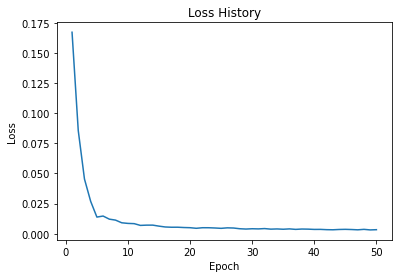

In [ ]:
# visualize loss history to get how many optimum epoch
  # Get training and test loss histories
  training_loss_univariate = modelfit_multivariate.history['loss']

  # Create count of the number of epochs
  epoch_count_univariate = range(1, len(training_loss_univariate) + 1)

  # Visualize loss history
  plt.plot(epoch_count_univariate, training_loss_univariate)
  #plt.plot(epoch_count, test_loss, 'b-')
  plt.title('Loss History')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

2. Applied model to data testing

inputs_univariate have (n_timestep + n) row of data which is consist of :
- last n_timestep row of data training
- n row of data testing

knapa ditambah n_timestep terakhir? untuk dapat memprediksi value pertama di data testing, butuh n_timestep (tergantung settingan timestep) data ke belakang kann

In [ ]:
# make data structure which is consist of all data testing + last 60 row of data training
  dataset_total_ASII_mlp_multivariate = pd.concat((data_train_ASII_multivariate, data_test_ASII_multivariate), axis = 0)
  inputs_ASII_mlp_multivariate = dataset_total_ASII_mlp_multivariate[len(dataset_total_ASII_mlp_multivariate) - len(data_test_ASII_multivariate) - n_timestep:]
  inputs_ASII_mlp_multivariate = inputs_ASII_mlp_multivariate.reset_index(drop=True) # drop index column
  inputs_ASII_mlp_multivariate.index = inputs_ASII_mlp_multivariate.index + 1 # start index from 1

In [ ]:
# data testing normalization
 # harga saham
    saham_inputs_ASII_mlp_multivariate_normalized = saham_ASII_mlp_multivariate_normalizer.transform(inputs_ASII_mlp_multivariate[['saham_ASII']])
    
 # harga kurs
    kurs_inputs_ASII_mlp_multivariate_normalized = kurs_ASII_mlp_normalizer.transform(inputs_ASII_mlp_multivariate[['harga_kurs']])

In [ ]:
# convert to [rows, columns] structure
saham_input_test_ASII_mlp_multivariate = saham_inputs_ASII_mlp_multivariate_normalized.reshape((len(saham_inputs_ASII_mlp_multivariate_normalized), 1))
kurs_input_test_ASII_mlp_multivariate = kurs_inputs_ASII_mlp_multivariate_normalized.reshape((len(kurs_inputs_ASII_mlp_multivariate_normalized), 1))

# combine features by horizontally
features_input_test_ASII_mlp_multivariate = hstack((kurs_input_test_ASII_mlp_multivariate, saham_input_test_ASII_mlp_multivariate))

In [ ]:
input_ASII_mlp_multivariate = []
for i in range(n_timestep, len(features_input_test_ASII_mlp_multivariate)):
    input_ASII_mlp_multivariate.append(features_input_test_ASII_mlp_multivariate[i-n_timestep:i, : ])#[i-n_timestep:i, : ])
input_ASII_mlp_multivariate = np.array(input_ASII_mlp_multivariate)
input_ASII_mlp_multivariate = input_ASII_mlp_multivariate.reshape((input_ASII_mlp_multivariate.shape[0], n_input_ASII_mlp_multivariate))

# apply prediction to data validation
predicted_ASII_mlp_multivariate = model_MLP_multivariate.predict(input_ASII_mlp_multivariate) 
predicted_ASII_mlp_multivariate = saham_ASII_mlp_multivariate_normalizer.inverse_transform(predicted_ASII_mlp_multivariate) # denormalization forecast result

# combine with actual data
predicted_result_mlp_multivariate = combineWithActual(actual= data_aktual, forecast= predicted_ASII_mlp_multivariate)
predicted_result_mlp_multivariate

,tanggal,Harga Saham Aktual,Harga Saham Prediksi
1,"Apr 02, 2018",7550.0,7333.876953
2,"Apr 03, 2018",7675.0,7546.821289
3,"Apr 04, 2018",7575.0,7657.802734
4,"Apr 05, 2018",7600.0,7584.294922
5,"Apr 06, 2018",7525.0,7672.007812
...,...,...,...
387,"Sep 24, 2019",6475.0,6659.824707
388,"Sep 25, 2019",6500.0,6467.052734
389,"Sep 26, 2019",6700.0,6548.399902
390,"Sep 27, 2019",6650.0,6642.260254


In [ ]:
predict_visualization_datatesting_univariate = predicted_result_mlp_multivariate.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_datatesting_univariate = px.line(predict_visualization_datatesting_univariate, x='tanggal' , y='value' , color='variable')
fig_predict_datatesting_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk. (Data Testing)",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_datatesting_univariate.show()

In [ ]:
# MAPE
nilaiMAPE_mlp_multivariate = MAPE(predicted_result_mlp_multivariate['Harga Saham Aktual'], predicted_result_mlp_multivariate['Harga Saham Prediksi'])
print('Nilai MAPE Multilayer Perceptron Multivariate: %s' % (nilaiMAPE_mlp_multivariate))

Nilai MAPE Multilayer Perceptron Multivariate: 2.961258757687169


In [ ]:
# # write to excel
predicted_result_mlp_multivariate.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Metode Lain/ASII MLP Multivariate Prediction.xlsx") 

# Revision (Compare with current data)

Oktober 2014-Mei 2020

In [ ]:
n_timestep = 10

In [ ]:
dataset_ASII_full = data_full[['saham_ASII']]

In [ ]:
# split daata
data_train_full, data_test_full= split_dataset(dataset_ASII_full, training_size_full)

In [ ]:
# feature scaling
saham_normalized_full, saham_normalizer_full = featureScaling(data_train_full, 'saham_ASII', 'univariate')

In [ ]:
train_input_full, train_output_full = getInputOutput(saham_normalized_full, len(data_train_full), 'univariate')
# reshape into [ samples, timestep, how many features to predict]
train_input_full = train_input_full.reshape((train_input_full.shape[0], train_input_full.shape[1], n_features_univariate))

In [ ]:
for i in range(len(train_input_full)):
	print(train_input_full[i], train_input_full[i])

In [ ]:
# build model to training subset
# Initialising the RNN
best_model_univariate = Sequential()

# units is how many hidden layer
best_model_univariate.add(SimpleRNN(
                          units = n_hiddenlayerunits_univariate, 
                          input_shape = (train_input_full.shape[1] , train_input_full.shape[2]), 
                          activation = activation_type_univariate, 
                          dropout = dropout_rate_univariate
                        )
                      ) 

# Adding the output layer
best_model_univariate.add(Dense(units = 1))

# Compiling the RNN
best_model_univariate.compile(loss='mean_squared_error', optimizer=optimizer_type_univariate)

#model.summary()

# Fitting the RNN to the Training set
start_time = time.time()
modelfit_univariate = best_model_univariate.fit(
      train_input_full, # independent features to predict
      train_output_full, # dependent features to predict
      epochs = n_epochs, # number of complete passes through the training dataset
      batch_size = n_batchSize_univariate, # number of samples processed before the model is updated
      validation_split= valid_size
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
)
runningtime = time.time() - start_time
print("Running Time Model : --- %s seconds ---" % runningtime)

Train on 907 samples, validate on 389 samples
Epoch 1/50
907/907 [==============================] - 0s 269us/step - loss: 0.0802 - val_loss: 0.0119
Epoch 2/50
907/907 [==============================] - 0s 51us/step - loss: 0.0289 - val_loss: 0.0059
Epoch 3/50
907/907 [==============================] - 0s 51us/step - loss: 0.0196 - val_loss: 0.0033
Epoch 4/50
907/907 [==============================] - 0s 52us/step - loss: 0.0116 - val_loss: 0.0048
Epoch 5/50
907/907 [==============================] - 0s 51us/step - loss: 0.0087 - val_loss: 0.0064
Epoch 6/50
907/907 [==============================] - 0s 54us/step - loss: 0.0095 - val_loss: 0.0228
Epoch 7/50
907/907 [==============================] - 0s 50us/step - loss: 0.0105 - val_loss: 0.0028
Epoch 8/50
907/907 [==============================] - 0s 50us/step - loss: 0.0093 - val_loss: 0.0063
Epoch 9/50
907/907 [==============================] - 0s 52us/step - loss: 0.0086 - val_loss: 0.0085
Epoch 10/50
907/907 [=======================

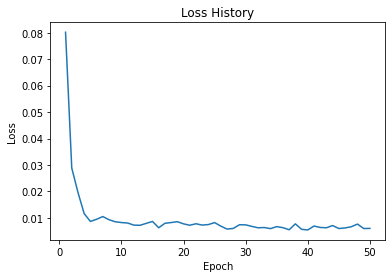

In [ ]:
# visualize loss history to get how many optimum epoch
# Get training and test loss histories
training_loss_univariate = modelfit_univariate.history['loss']
  
# Create count of the number of epochs
epoch_count_univariate = range(1, len(training_loss_univariate) + 1)

# Visualize loss history
plt.plot(epoch_count_univariate, training_loss_univariate)
#plt.plot(epoch_count, test_loss, 'b-')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# define inputs for data testing
dataset_total_full = pd.concat((data_train_full, data_test_full), axis = 0)
test_input_univariate_full = dataset_total_full[len(dataset_total_full) - len(data_test_full) - n_timestep_univariate:].values
test_input_univariate_full = test_input_univariate_full.reshape(-1,1)
test_input_univariate_full = saham_normalizer_full.transform(test_input_univariate_full)

In [ ]:
datatesting_input_univariate_full = []
for i in range(n_timestep, len(test_input_univariate_full)):
    datatesting_input_univariate_full.append(test_input_univariate_full[i-n_timestep_univariate:i, 0])
datatesting_input_univariate_full = np.array(datatesting_input_univariate_full)
datatesting_input_univariate_full = datatesting_input_univariate_full.reshape((datatesting_input_univariate_full.shape[0], datatesting_input_univariate_full.shape[1], n_features_univariate))

# apply prediction to data testing
datatesting_predicted_univariate_full = best_model_univariate.predict(datatesting_input_univariate_full) 
datatesting_predicted_univariate_full = saham_normalizer_full.inverse_transform(datatesting_predicted_univariate_full) # denormalization forecast result

# combine with actual data
predicted_result_univariate_full = combineWithActual(actual= data_aktual_full, forecast= datatesting_predicted_univariate_full)

In [ ]:
predict_visualization_datatesting_univariate = predicted_result_univariate_full.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_datatesting_univariate = px.line(predict_visualization_datatesting_univariate, x='tanggal' , y='value' , color='variable')
fig_predict_datatesting_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Medco Energi Internasional Tbk.",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_datatesting_univariate.show()

In [ ]:
# MAPE
nilaiMAPE_ASIInew_univariate = MAPE(predicted_result_univariate_full['Harga Saham Aktual'], predicted_result_univariate_full['Harga Saham Prediksi'])
print('Nilai MAPE Data Testing: %.2f' % (nilaiMAPE_ASIInew_univariate))

Nilai MAPE Data Testing: 10.91


In [ ]:
# predicted_result_univariate_full.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Data Terbaru/Univariate Prediction Full Data.xlsx")

Multivariate Modelling

In [ ]:
n_timestep = 9

In [ ]:
# split and normalize data
data_train_multivariate_full, data_test_multivariate_full = split_dataset(data_full, training_size_full)

# normalize
saham_multivariate_normalized, kurs_multivariate_normalized, saham_multivariate_normalizer, kurs_multivariate_normalizer = featureScaling(data_train_multivariate_full, 'saham_ASII', 'multivariate')

In [ ]:
# convert to [rows, columns] structure
saham_input_multivariate_full = saham_multivariate_normalized.reshape((len(saham_multivariate_normalized), 1))
kurs_input_multivariate_full = kurs_multivariate_normalized.reshape((len(kurs_multivariate_normalized), 1))

# combine features by horizontally
features_input_multivariate_full = hstack((kurs_input_multivariate_full, saham_input_multivariate_full))

In [ ]:
train_input_multivariate_full, train_output_multivariate_full = getInputOutput(data= features_input_multivariate_full,
                                                                      trainsubset_size= len(data_train_multivariate_full),
                                                                      input_type = 'multivariate'
                                                                    )

In [ ]:
for i in range(len(train_input_multivariate_full)):
	print(train_input_multivariate_full[i], train_output_multivariate_full[i])

Streaming output truncated to the last 5000 lines.
 [0.41236476 0.69565217]
 [0.41962906 0.65838509]
 [0.41700155 0.67701863]
 [0.42071097 0.67080745]] 0.6770186335403727
[[0.40680062 0.65838509]
 [0.40834621 0.68944099]
 [0.40587326 0.71428571]
 [0.41190108 0.71428571]
 [0.41236476 0.69565217]
 [0.41962906 0.65838509]
 [0.41700155 0.67701863]
 [0.42071097 0.67080745]
 [0.42612056 0.67701863]] 0.6770186335403727
[[0.40834621 0.68944099]
 [0.40587326 0.71428571]
 [0.41190108 0.71428571]
 [0.41236476 0.69565217]
 [0.41962906 0.65838509]
 [0.41700155 0.67701863]
 [0.42071097 0.67080745]
 [0.42612056 0.67701863]
 [0.42612056 0.67701863]] 0.68944099378882
[[0.40587326 0.71428571]
 [0.41190108 0.71428571]
 [0.41236476 0.69565217]
 [0.41962906 0.65838509]
 [0.41700155 0.67701863]
 [0.42071097 0.67080745]
 [0.42612056 0.67701863]
 [0.42612056 0.67701863]
 [0.42102009 0.68944099]] 0.6832298136645962
[[0.41190108 0.71428571]
 [0.41236476 0.69565217]
 [0.41962906 0.65838509]
 [0.41700155 0.677018

In [ ]:
# build model to training subset
# Initialising the RNN
model_multivariate = Sequential()

# units is how many hidden layer
model_multivariate.add(SimpleRNN(
                          units = n_hiddenlayerunits_multivariate, 
                          input_shape = (train_input_multivariate_full.shape[1] , train_input_multivariate_full.shape[2]), 
                          activation = activation_type_multivariate, 
                          dropout = dropout_rate_multivariate
                        )
                      ) 

# Adding the output layer
model_multivariate.add(Dense(units = n_outputlayerunits_multivariate))

# Compiling the RNN
model_multivariate.compile(loss='mean_squared_error', optimizer = optimizer_type_multivariate)

#model.summary()

# Fitting the RNN to the Training set
start_time = time.time()
modelfit_multivariate = model_multivariate.fit(
      train_input_multivariate_full, # independent features to predict
      train_output_multivariate_full, # dependent features to predict
      epochs = n_epochs, # number of complete passes through the training dataset
      batch_size = n_batchSize_multivariate, # number of samples processed before the model is updated
      validation_split= valid_size # split data training into training : validation
      #verbose=0 # 0 gaada progress tiap epoch, 1 ada animasi [=====], 2 langsung nunjukin lossnya berapa
)
print("Running Time Model : --- %s seconds ---" % (time.time() - start_time))

Train on 907 samples, validate on 390 samples
Epoch 1/50
907/907 [==============================] - 0s 347us/step - loss: 0.1106 - val_loss: 0.0399
Epoch 2/50
907/907 [==============================] - 0s 97us/step - loss: 0.0405 - val_loss: 0.1147
Epoch 3/50
907/907 [==============================] - 0s 95us/step - loss: 0.0372 - val_loss: 0.0190
Epoch 4/50
907/907 [==============================] - 0s 95us/step - loss: 0.0290 - val_loss: 0.0171
Epoch 5/50
907/907 [==============================] - 0s 96us/step - loss: 0.0250 - val_loss: 0.0770
Epoch 6/50
907/907 [==============================] - 0s 97us/step - loss: 0.0220 - val_loss: 0.0264
Epoch 7/50
907/907 [==============================] - 0s 107us/step - loss: 0.0187 - val_loss: 0.0811
Epoch 8/50
907/907 [==============================] - 0s 99us/step - loss: 0.0184 - val_loss: 0.0103
Epoch 9/50
907/907 [==============================] - 0s 97us/step - loss: 0.0167 - val_loss: 0.0433
Epoch 10/50
907/907 [======================

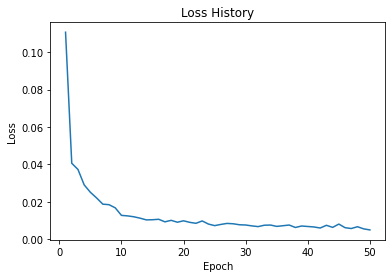

In [ ]:
# visualize loss history to get how many optimum epoch
# Get training and test loss histories
training_loss_multivariate = modelfit_multivariate.history['loss']
  
# Create count of the number of epochs
epoch_count_multivariate = range(1, len(training_loss_multivariate) + 1)

# Visualize loss history
plt.plot(epoch_count_multivariate, training_loss_multivariate)
#plt.plot(epoch_count, test_loss, 'b-')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# make data structure which is consist of all data testing + last 60 row of data training
dataset_total_multivariate_full = pd.concat((data_train_multivariate_full, data_test_multivariate_full), axis = 0)
inputs_multivariate_full = dataset_total_multivariate_full[len(dataset_total_multivariate_full) - len(data_test_multivariate_full) - n_timestep:]
inputs_multivariate_full = inputs_multivariate_full.reset_index(drop=True) # drop index column
inputs_multivariate_full.index = inputs_multivariate_full.index + 1 # start index from 1

In [ ]:
# data testing normalization
# harga saham
saham_inputs_multivariate_normalized_full = saham_multivariate_normalizer.transform(inputs_multivariate_full[['saham_ASII']])    
# harga kurs
kurs_inputs_multivariate_normalized_full = kurs_multivariate_normalizer.transform(inputs_multivariate_full[['harga_kurs']])

# convert to [rows, columns] structure
saham_input_test_multivariate = saham_inputs_multivariate_normalized_full.reshape((len(saham_inputs_multivariate_normalized_full), 1))
kurs_input_test_multivariate = kurs_inputs_multivariate_normalized_full.reshape((len(kurs_inputs_multivariate_normalized_full), 1))

# combine features by horizontally
features_input_test_multivariate_full = hstack((kurs_input_test_multivariate, saham_input_test_multivariate))

In [ ]:
input_test_multivariate_full = []
for i in range(n_timestep, len(features_input_test_multivariate_full)):
    input_test_multivariate_full.append(features_input_test_multivariate_full[i-n_timestep:i, : ])
input_test_multivariate_full = np.array(input_test_multivariate_full)
input_test_multivariate_full = input_test_multivariate_full.reshape((input_test_multivariate_full.shape[0], input_test_multivariate_full.shape[1], n_features_multivariate))

# apply prediction to data validation
predicted_multivariate_full = model_multivariate.predict(input_test_multivariate_full) 
predicted_multivariate_full = saham_multivariate_normalizer.inverse_transform(predicted_multivariate_full) # denormalization forecast result

# combine with actual data
predicted_result_multivariate_full = combineWithActual(actual= data_aktual_full, forecast= predicted_multivariate_full)
predicted_result_multivariate_full

,tanggal,Harga Saham Aktual,Harga Saham Prediksi
1,"Oct 03, 2019",6475.0,6340.442871
2,"Oct 04, 2019",6425.0,6340.281738
3,"Oct 07, 2019",6325.0,6370.062012
4,"Oct 08, 2019",6350.0,6291.368652
5,"Oct 09, 2019",6275.0,6286.818848
...,...,...,...
157,"May 14, 2020",3570.0,6516.698242
158,"May 15, 2020",3710.0,6352.998047
159,"May 18, 2020",3910.0,6432.375977
160,"May 19, 2020",3950.0,6625.006348


In [ ]:
predicted_result_multivariate_visualization = predicted_result_multivariate_full.melt(id_vars='tanggal', value_vars=['Harga Saham Aktual', 'Harga Saham Prediksi'])
fig_predict_multivariate = px.line(predicted_result_multivariate_visualization, x='tanggal' , y='value' , color='variable')
fig_predict_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Medco Energi Internasional Tbk.",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
)
fig_predict_multivariate.show()

In [ ]:
# MAPE
nilaiMAPE_ASIInew_multivariate = MAPE(predicted_result_multivariate_full['Harga Saham Aktual'], predicted_result_multivariate_full['Harga Saham Prediksi'])
print('Nilai MAPE Data Testing: %.2f' % (nilaiMAPE_ASIInew_multivariate))

Nilai MAPE Data Testing: 18.91


In [ ]:
predicted_result_multivariate_full.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Data Terbaru/Multivariate Prediction Full Data.xlsx")

# Grid Search

In [ ]:
# univariate
dataset_ASII_univariate = dataset_ASII.drop(columns= 'harga_kurs')

# multivariate
dataset_ASII_multivariate = dataset_ASII.copy()

In [ ]:
# define input type
# OPTION FOR INPUT TYPE : 'univariate' or 'multivariate'
inputType = 'multivariate'

In [ ]:
# how many time step backward to predict future?
n_timestep = 9

In [ ]:
hidden_node = [33,34,35]

In [ ]:
# define parameter list
parameter_list = model_parameters_list(n_hidden_layer= hidden_node)
parameter_list

Total Parameter Scenario: 243


[[33, 'relu', 32, 'adam', 0.1],
 [33, 'relu', 32, 'adam', 0.3],
 [33, 'relu', 32, 'adam', 0.5],
 [33, 'relu', 32, 'rmsprop', 0.1],
 [33, 'relu', 32, 'rmsprop', 0.3],
 [33, 'relu', 32, 'rmsprop', 0.5],
 [33, 'relu', 32, 'sgd', 0.1],
 [33, 'relu', 32, 'sgd', 0.3],
 [33, 'relu', 32, 'sgd', 0.5],
 [33, 'relu', 64, 'adam', 0.1],
 [33, 'relu', 64, 'adam', 0.3],
 [33, 'relu', 64, 'adam', 0.5],
 [33, 'relu', 64, 'rmsprop', 0.1],
 [33, 'relu', 64, 'rmsprop', 0.3],
 [33, 'relu', 64, 'rmsprop', 0.5],
 [33, 'relu', 64, 'sgd', 0.1],
 [33, 'relu', 64, 'sgd', 0.3],
 [33, 'relu', 64, 'sgd', 0.5],
 [33, 'relu', 96, 'adam', 0.1],
 [33, 'relu', 96, 'adam', 0.3],
 [33, 'relu', 96, 'adam', 0.5],
 [33, 'relu', 96, 'rmsprop', 0.1],
 [33, 'relu', 96, 'rmsprop', 0.3],
 [33, 'relu', 96, 'rmsprop', 0.5],
 [33, 'relu', 96, 'sgd', 0.1],
 [33, 'relu', 96, 'sgd', 0.3],
 [33, 'relu', 96, 'sgd', 0.5],
 [33, 'softsign', 32, 'adam', 0.1],
 [33, 'softsign', 32, 'adam', 0.3],
 [33, 'softsign', 32, 'adam', 0.5],
 [33, 'sof

In [ ]:
if (inputType.lower() == 'univariate'):
	scores = grid_search(data = dataset_ASII_univariate, list_parameter= parameter_list, 
	                     build_iteration = 2, stockname= 'saham_ASII', input_type= inputType)
elif (inputType.lower() == 'multivariate'):
	scores = grid_search(data = dataset_ASII_multivariate, list_parameter= parameter_list, 
	                     build_iteration = 2, stockname= 'saham_ASII', input_type= inputType)

print('Building Model Complete')
# list top 3 parameter scenario
for parameter, mapeError in scores[:3]: # top 3
	print(parameter, mapeError)
 
# get list of best model
models= scores[:]
models = pd.DataFrame(models)
models.columns = ['Parameter', 'MAPE']

# write to excel
if (inputType.lower() == 'univariate'):
	models.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Univariate/Timestep " + str(n_timestep) + "/" + "Rekapan MAPE Parameter "+ str(hidden_node) +".xlsx") 
elif (inputType.lower() == 'multivariate'):
	models.to_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Multivariate/Timestep " + str(n_timestep) + "/" + "Rekapan MAPE Parameter "+ str(hidden_node) +".xlsx")

Running Time Model : --- 3.6797893047332764 seconds ---
MAPE iteration 1 = 3.131


In [ ]:
models.head(10)

# Plotting Best Model

Load best RNN model result

In [ ]:
# ASII
ASII_univariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Model Terbaik/Univariate/Model [30, \'softsign\', 64, \'rmsprop\', 0.1] with MAPE 1.546 and build time 37.865.xlsx")
ASII_univariate_rnn = ASII_univariate_rnn.drop('Unnamed: 0', axis= 1)
ASII_univariate_rnn.columns= ['Tanggal','Aktual','Prediksi']
# ASII_multivariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Model Terbaik/Multivariate/Model [52, \'tanh\', 32, \'rmsprop\', 0.1] with MAPE 1.56 and build time 23.657.xlsx")
ASII_multivariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Model Terbaik/Multivariate/Forecast Result [52, \'tanh\', 32, \'rmsprop\', 0.1] with MAPE 1.558 and build time 4.02.xlsx")
ASII_multivariate_rnn = ASII_multivariate_rnn.drop('Unnamed: 0', axis= 1)
ASII_multivariate_rnn.columns= ['Tanggal','Aktual','Prediksi']

# MEDC
MEDC_univariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/MEDC Univariate Prediction.xlsx")
MEDC_univariate_rnn = MEDC_univariate_rnn.drop('Unnamed: 0', axis= 1)
MEDC_univariate_rnn.columns= ['Tanggal','Aktual','Prediksi']
MEDC_multivariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/MEDC Multivariate Prediction.xlsx")
MEDC_multivariate_rnn = MEDC_multivariate_rnn.drop('Unnamed: 0', axis= 1)
MEDC_multivariate_rnn.columns= ['Tanggal','Aktual','Prediksi']

# INAF
INAF_univariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/INAF Univariate Prediction.xlsx")
INAF_univariate_rnn = INAF_univariate_rnn.drop('Unnamed: 0', axis= 1)
INAF_univariate_rnn.columns= ['Tanggal','Aktual','Prediksi']
INAF_multivariate_rnn = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Saham Lain/INAF Multivariate Prediction.xlsx")
INAF_multivariate_rnn = INAF_multivariate_rnn.drop('Unnamed: 0', axis= 1)
INAF_multivariate_rnn.columns= ['Tanggal','Aktual','Prediksi']

In [ ]:
# With new dataset

# full sept 2019-may 2020
ASII_univariate_oktmay = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Data Terbaru/Univariate Prediction Full Data.xlsx")
ASII_univariate_oktmay = ASII_univariate_oktmay.drop('Unnamed: 0', axis= 1)
ASII_univariate_oktmay.columns= ['Tanggal','Aktual','Prediksi']
ASII_multivariate_oktmay = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Data Terbaru/Multivariate Prediction Full Data.xlsx")
ASII_multivariate_oktmay = ASII_multivariate_oktmay.drop('Unnamed: 0', axis= 1)
ASII_multivariate_oktmay.columns= ['Tanggal','Aktual','Prediksi']

Load best ANN model result

In [ ]:
# ASII
ASII_univariate_ann = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Metode Lain/ASII MLP Univariate Prediction.xlsx")
ASII_univariate_ann = ASII_univariate_ann.drop('Unnamed: 0', axis= 1)
ASII_univariate_ann.columns= ['Tanggal','Aktual','Prediksi']
ASII_multivariate_ann = pd.read_excel("/content/drive/My Drive/KULIAH/TA/TA/Documentation/Hasil Forecast/Metode Lain/ASII MLP Multivariate Prediction.xlsx")
ASII_multivariate_ann = ASII_multivariate_ann.drop('Unnamed: 0', axis= 1)
ASII_multivariate_ann.columns= ['Tanggal','Aktual','Prediksi']

**Recurrent Neural Network**



**Univariate**





> ASII



In [ ]:
ASII_univariate_rnn.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_univariate_rnn_visualization = ASII_univariate_rnn.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_univariate = px.line(bestforecast_univariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    )
)
fig_predict_rnn_univariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_univariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_univariate.show()

In [ ]:
# norm
aktual = bestforecast_univariate_rnn[['Aktual']]
pred = bestforecast_univariate_rnn[['Prediksi']]

aktual_norm = normalizer.transform(aktual)
pred_norm = normalizer.transform(pred)

# Measuring MSE on data testing
MSE(aktual_norm,pred_norm)

0.001300716666474402

In [ ]:
ASII_univariate_oktmay.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_univariate_rnn_visualization = ASII_univariate_oktmay.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_univariate = px.line(bestforecast_univariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    )
)
fig_predict_rnn_univariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_univariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_univariate.show()

In [ ]:
# norm
aktual = ASII_univariate_oktmay[['Aktual']]
pred = ASII_univariate_oktmay[['Prediksi']]

aktual_norm = normalizer.transform(aktual)
pred_norm = normalizer.transform(pred)

# Measuring MSE on data testing
MSE(aktual_norm,pred_norm)

0.07336699920551376



> MEDC



In [ ]:
MEDC_univariate_rnn.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_univariate_rnn_visualization = MEDC_univariate_rnn.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_univariate = px.line(bestforecast_univariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_rnn_univariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_univariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_univariate.show()

In [ ]:
# norm
aktual_MEDC_uni = MEDC_univariate_rnn[['Aktual']]
pred_MEDC_uni = MEDC_univariate_rnn[['Prediksi']]

aktual_MEDC_uni_norm = saham_MEDC_normalizer.transform(aktual_MEDC_uni)
pred_MEDC_uni_norm = saham_MEDC_normalizer.transform(pred_MEDC_uni)

# Measuring MSE on data testing
MSE(aktual_MEDC_uni_norm,pred_MEDC_uni_norm)

9.006231042981295e-05

In [ ]:
MAPE(MEDC_univariate_rnn.Aktual,MEDC_univariate_rnn.Prediksi)

3.0314989100488203



> INAF



In [ ]:
INAF_univariate_rnn.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_univariate_rnn_visualization = INAF_univariate_rnn.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_univariate = px.line(bestforecast_univariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_rnn_univariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_univariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_univariate.show()

In [ ]:
# norm
aktual_INAF_uni = INAF_univariate_rnn[['Aktual']]
pred_INAF_uni = INAF_univariate_rnn[['Prediksi']]

aktual_INAF_uni_norm = saham_INAF_normalizer.transform(aktual_INAF_uni)
pred_INAF_uni_norm = saham_INAF_normalizer.transform(pred_INAF_uni)

# Measuring MSE on data testing
MSE(aktual_INAF_uni_norm,pred_INAF_uni_norm)

0.003305830661979438

In [ ]:
MAPE(INAF_univariate_rnn.Aktual,INAF_univariate_rnn.Prediksi)

6.020151765247613

**Multivariate**

In [ ]:
ASII_multivariate_rnn.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_multivariate_rnn_visualization = ASII_multivariate_rnn.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_multivariate = px.line(bestforecast_multivariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=14,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_rnn_multivariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_multivariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_multivariate.show()

In [ ]:
# norm
aktual_multi = ASII_multivariate_rnn[['Aktual']]
pred_multi = ASII_multivariate_rnn[['Prediksi']]

aktual_multi_norm = saham_normalizer.transform(aktual_multi)
pred_multi_norm = saham_normalizer.transform(pred_multi)

# Measuring MSE on data testing
MSE(aktual_multi_norm,pred_multi_norm)

0.0013432396392139016

In [ ]:
ASII_multivariate_oktmay.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_multivariate_rnn_visualization = ASII_multivariate_oktmay.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_multivariate = px.line(bestforecast_multivariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_rnn_multivariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_multivariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_multivariate.show()

In [ ]:
# norm
aktual_multi = ASII_multivariate_oktmay[['Aktual']]
pred_multi = ASII_multivariate_oktmay[['Prediksi']]


# Measuring MSE on data testing
MSE(saham_multivariate_normalizer.transform(aktual_multi) , saham_multivariate_normalizer.transform(pred_multi))

0.2045267266159447



> MEDC



In [ ]:
MEDC_multivariate_rnn.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_univariate_rnn_visualization = MEDC_multivariate_rnn.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_multivariate = px.line(bestforecast_univariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Harga Saham",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_rnn_multivariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_multivariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_multivariate.show()

In [ ]:
# norm
aktual_MEDC_multi = MEDC_multivariate_rnn[['Aktual']]
pred_MEDC_multi = MEDC_multivariate_rnn[['Prediksi']]

aktual_MEDC_multi_norm = saham_MEDC_normalizer.transform(aktual_MEDC_multi)
pred_MEDC_multi_norm = saham_MEDC_normalizer.transform(pred_MEDC_multi)

# Measuring MSE on data testing
MSE(aktual_MEDC_multi_norm,pred_MEDC_multi_norm)

0.004561218046593822



> INAF



In [ ]:
INAF_multivariate_rnn.columns = ['Date', 'Actual', 'Forecast']

In [ ]:
bestforecast_univariate_rnn_visualization = INAF_multivariate_rnn.melt(id_vars='Date', value_vars=['Actual', 'Forecast'])
fig_predict_rnn_multivariate = px.line(bestforecast_univariate_rnn_visualization, x='Date' , y='value' , color='variable')
fig_predict_rnn_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="tnr",
        size=12,
        color="#000000"
    ),
    legend=dict(
        x=0.2,
        y=-0.5,
        traceorder="normal",
        font=dict(
            family="tnr",
            size=12,
            color="black"
        ),
        orientation ='h',
        bgcolor="White",
        bordercolor="Black",
        borderwidth=1
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_rnn_multivariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_rnn_multivariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_rnn_multivariate.show()

In [ ]:
# norm
aktual_INAF_multi = INAF_multivariate_rnn[['Aktual']]
pred_INAF_multi = INAF_multivariate_rnn[['Prediksi']]

aktual_INAF_multi_norm = saham_INAF_normalizer.transform(aktual_INAF_multi)
pred_INAF_multi_norm = saham_INAF_normalizer.transform(pred_INAF_multi)

# Measuring MSE on data testing
MSE(aktual_INAF_multi_norm,pred_INAF_multi_norm)

1.340153665660488

**Multilayer Perceptron**



**Univariate**





> ASII



In [ ]:
bestforecast_univariate_ann_visualization = ASII_univariate_ann.melt(id_vars='Tanggal', value_vars=['Aktual', 'Prediksi'])
fig_predict_ann_univariate = px.line(bestforecast_univariate_ann_visualization, x='Tanggal' , y='value' , color='variable')
fig_predict_ann_univariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_ann_univariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_ann_univariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_ann_univariate.show()

In [ ]:
# norm
aktual_ASII_uni_ann = ASII_univariate_rnn[['Aktual']]
pred_ASII_uni_ann = ASII_univariate_ann[['Prediksi']]

aktual_ASII_uni_ann_norm = normalizer.transform(aktual_ASII_uni_ann)
pred_ASII_uni_ann_norm = normalizer.transform(pred)

# Measuring MSE on data testing
MSE(aktual_ASII_uni_ann_norm,pred_ASII_uni_ann_norm)

0.0018583550382383733

**Multivariate**

In [ ]:
bestforecast_multivariate_ann_visualization = ASII_multivariate_ann.melt(id_vars='Tanggal', value_vars=['Aktual', 'Prediksi'])
fig_predict_ann_multivariate = px.line(bestforecast_multivariate_ann_visualization, x='Tanggal' , y='value' , color='variable')
fig_predict_ann_multivariate.update_layout(
    # title="Perbandingan Nilai Aktual dan Nilai Prediksi Harga Saham PT Astra International Tbk.",
    xaxis_title="Tanggal",
    yaxis_title="Harga Saham",
    font=dict(
        family="Montserrat",
        size=12,
        color="#000000"
    ),
  plot_bgcolor='rgba(0,0,0,0)'
)
fig_predict_ann_multivariate.update_xaxes(
  # showgrid=True, gridwidth=0.1, gridcolor='grey',
  showline=True, linewidth=1, linecolor='black'
  )
fig_predict_ann_multivariate.update_yaxes(
    # showgrid=True, gridwidth=0.1, gridcolor='grey',
    showline=True, linewidth=1, linecolor='black')
fig_predict_ann_multivariate.show()

In [ ]:
# norm
aktual_ASII_multi_ann = ASII_multivariate_ann[['Aktual']]
pred_ASII_multi_ann = ASII_multivariate_ann[['Prediksi']]

aktual_ASII_multi_ann_norm = normalizer.transform(aktual_ASII_multi_ann)
pred_ASII_multi_ann_norm = normalizer.transform(pred_ASII_multi_ann)

# Measuring MSE on data testing
MSE(aktual_ASII_multi_ann_norm,pred_ASII_multi_ann_norm)

0.00431324372210946

# END